In [4]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
import missingno
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)


In [4]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 89.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [7]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 83.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [8]:
!pip install --upgrade catboost

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4


In [10]:
!pip uninstall numpy -y
!pip install numpy
!pip uninstall catboost -y
!pip install catboost

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
Found existing installation: catboost 1.2.7
Uninstalling catboost-1.2.7:
  Successfully uninstalled catboost-1.2.7
  Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached numpy-1.26.4-cp311-cp311-ma

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer


In [2]:
libraries = {
    "numpy": "np",
    "pandas": "pd",
    "scipy": "scipy",
    "statsmodels": "statsmodels",
    "matplotlib": "matplotlib",
    "seaborn": "sns",
    "plotly": "plotly",
    "scikit-learn": "sklearn",
    "xgboost": "xgboost",
    "catboost": "catboost",
    "lightgbm": "lightgbm"
}


library_versions = {}


for lib in libraries.keys():
    try:

        if lib == "scikit-learn":
            import sklearn
            library_versions[lib] = sklearn.__version__
        else:
            module = __import__(lib)
            library_versions[lib] = module.__version__
    except ModuleNotFoundError:
        library_versions[lib] = "Not installed"
    except Exception as e:
        library_versions[lib] = f"Error: {str(e)}"

for lib, version in library_versions.items():
    if version == "Not installed":
        print(f"{lib}: Not installed. Install using 'pip install {lib}'")
    else:
        print(f"{lib}: {version}")

numpy: 1.26.4
pandas: 2.2.2
scipy: 1.14.1
statsmodels: 0.14.4
matplotlib: 3.10.0
seaborn: 0.13.2
plotly: 5.24.1
scikit-learn: 1.6.1
xgboost: 2.1.4
catboost: 1.2.7
lightgbm: 4.5.0


In [5]:
df = pd.read_csv("/content/crop_dataset.csv")

In [6]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [7]:
df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.0,392160,1356.2,22778368.48,74196.64,1.261818


In [8]:
df.sample(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
12707,Ginger,2012,Whole Year,Madhya Pradesh,10578.0,18036,1049.500000,1595162.40,3279.18,1.278837
3464,Garlic,2011,Whole Year,Karnataka,5100.0,6365,1178.986364,854352.00,1683.00,1.326667
7336,Small millets,2000,Kharif,Odisha,40520.0,15630,1066.000000,3977848.40,10535.20,0.411667
13741,Bajra,2014,Kharif,Haryana,393000.0,683000,301.300000,59327280.00,129690.00,1.869412
17534,Urad,2002,Kharif,Jammu and Kashmir,14232.0,5961,933.200000,1347343.44,3558.00,0.485556


In [9]:
df['Crop'] = df['Crop'].str.title()
df['State'] = df['State'].str.title()
df['Season'] = df['Season'].str.title()

In [10]:
df.shape

(19689, 10)

In [11]:
df.columns


Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [13]:
pd.options.display.float_format = '{:.2f}'.format
df.describe(include=["int64","float64"]).T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,19689.00,2009.13,6.50,1997.00,2004.00,2010.00,2015.00,2020.00
Area,19689.00,179926.57,732828.68,0.50,1390.00,9317.00,75112.00,50808100.00
Production,19689.00,16435941.27,263056839.81,0.00,1393.00,13804.00,122718.00,6326000000.00
Annual_Rainfall,19689.00,1437.76,816.91,301.30,940.70,1247.60,1643.70,6552.70
Fertilizer,19689.00,24103312.45,94946004.48,54.17,188014.62,1234957.44,10003847.20,4835406877.00
Pesticide,19689.00,48848.35,213287.35,0.09,356.70,2421.90,20041.70,15750511.00
Yield,19689.00,79.95,878.31,0.00,0.60,1.03,2.39,21105.00


In [14]:
df.describe(include=["object"]).T

,count,unique,top,freq
Crop,19689,55,Rice,1197
Season,19689,6,Kharif,8232
State,19689,30,Karnataka,1432


In [15]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [16]:
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


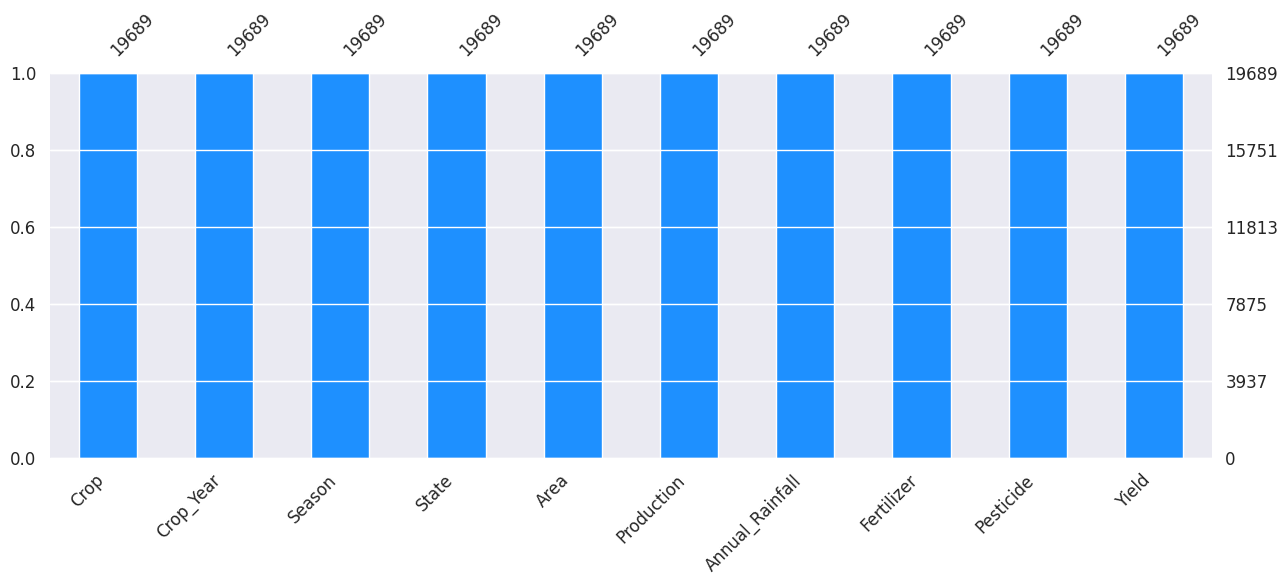

In [17]:
missingno.bar(df, figsize=(15,5), fontsize=12,color="dodgerblue", sort="ascending");
plt.show()

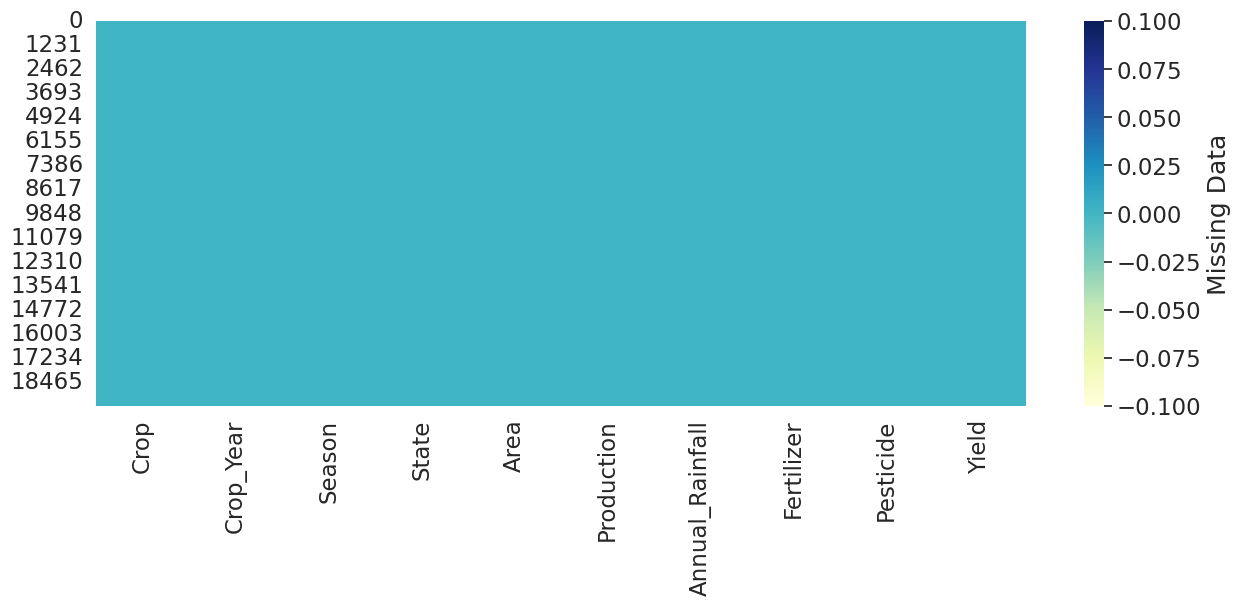

In [18]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'});

In [19]:
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,1997,73814.00,56708,2051.40,7024878.38,22882.34,0.80
1,1997,6637.00,4685,2051.40,631643.29,2057.47,0.71
2,1997,796.00,22,2051.40,75755.32,246.76,0.24
3,1997,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05
4,1997,1739.00,794,2051.40,165500.63,539.09,0.42


In [20]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data.head()

,Crop,Season,State
0,Arecanut,Whole Year,Assam
1,Arhar/Tur,Kharif,Assam
2,Castor Seed,Kharif,Assam
3,Coconut,Whole Year,Assam
4,Cotton(Lint),Kharif,Assam


In [21]:
numeric_data.corr()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.00,-0.04,0.00,-0.01,0.01,-0.00,0.00
Area,-0.04,1.00,0.04,-0.11,0.97,0.97,0.00
Production,0.00,0.04,1.00,0.03,0.04,0.04,0.57
Annual_Rainfall,-0.01,-0.11,0.03,1.00,-0.11,-0.10,0.02
Fertilizer,0.01,0.97,0.04,-0.11,1.00,0.95,0.00
Pesticide,-0.00,0.97,0.04,-0.10,0.95,1.00,0.00
Yield,0.00,0.00,0.57,0.02,0.00,0.00,1.00


In [22]:
fig = px.imshow(numeric_data.corr(),text_auto=True,aspect="auto")
fig.show()

In [23]:
df['Crop_Year'].value_counts(ascending=False)

,count
Crop_Year,
2019,1079
2017,1070
2018,1063
2016,1036
2015,998
2013,976
2014,965
2011,907
2012,894


In [24]:
df = df[df['Crop_Year'] != 2020]

In [25]:
df['Crop'].value_counts(ascending=False)


,count
Crop,
Rice,1195
Maize,973
Moong(Green Gram),738
Urad,731
Groundnut,724
Sesamum,684
Potato,626
Sugarcane,604
Wheat,544


In [26]:
df['Season'].value_counts(ascending=False)

,count
Season,
Kharif,8215
Rabi,5732
Whole Year,3712
Summer,1190
Autumn,414
Winter,389


In [27]:
df['State'].value_counts(ascending=False)

,count
State,
Karnataka,1432
Andhra Pradesh,1266
West Bengal,1094
Chhattisgarh,915
Bihar,896
Madhya Pradesh,845
Uttar Pradesh,825
Tamil Nadu,822
Gujarat,817


In [28]:
df_state_sort = df.groupby('State',as_index=False)['Yield'].sum().sort_values(by='Yield', ascending=False)
df_state_sort


,State,Yield
29,West Bengal,291986.75
21,Puducherry,232163.60
0,Andhra Pradesh,229735.18
24,Tamil Nadu,185813.28
2,Assam,160612.65
12,Karnataka,151391.87
13,Kerala,147710.35
6,Goa,87275.96
25,Telangana,39508.73
7,Gujarat,5471.63


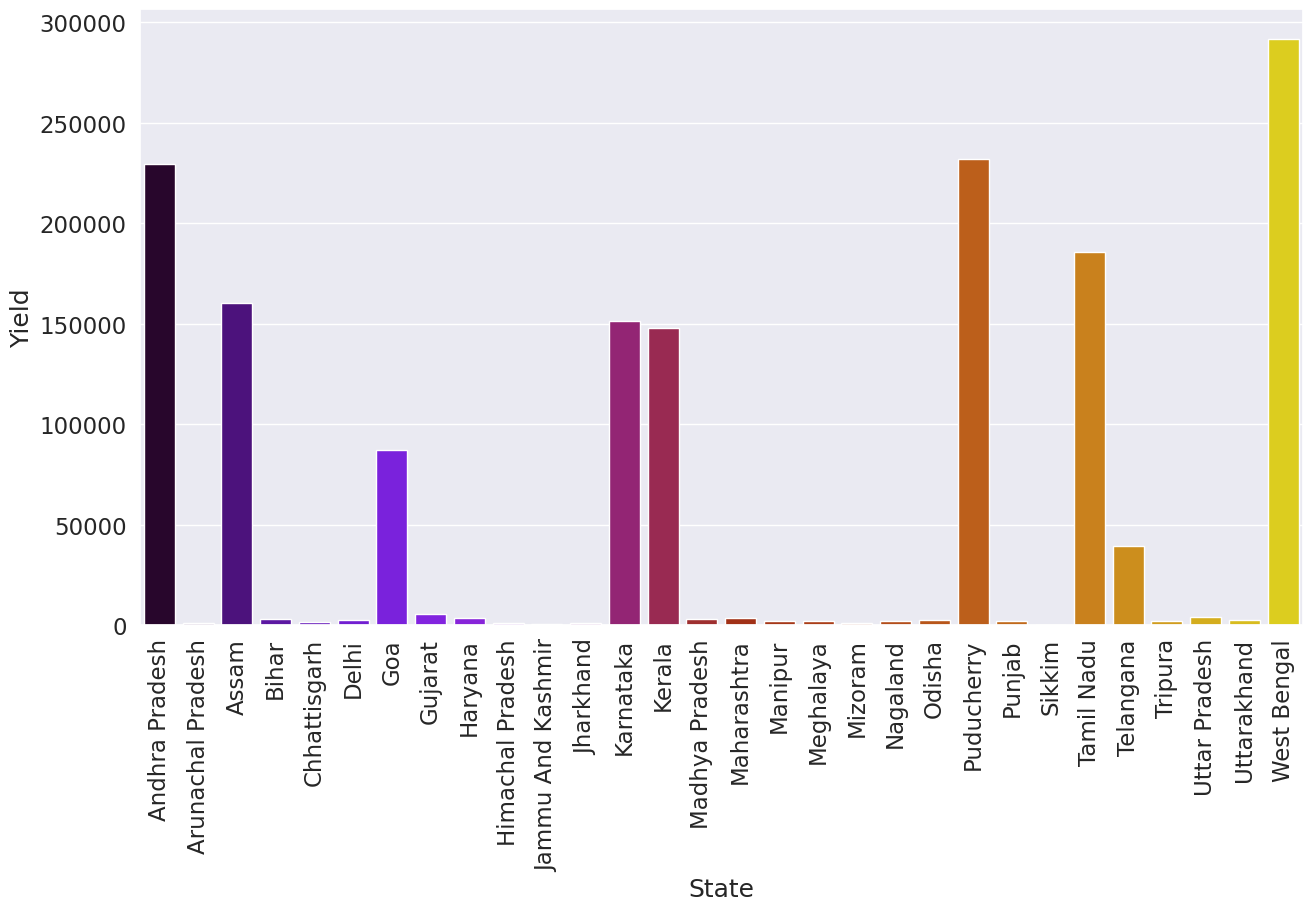

In [29]:
df_state = df.groupby('State',as_index=False)['Yield'].sum()
plt.figure(figsize = (15,8))
sns.barplot(x = df_state['State'], y=df_state['Yield'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

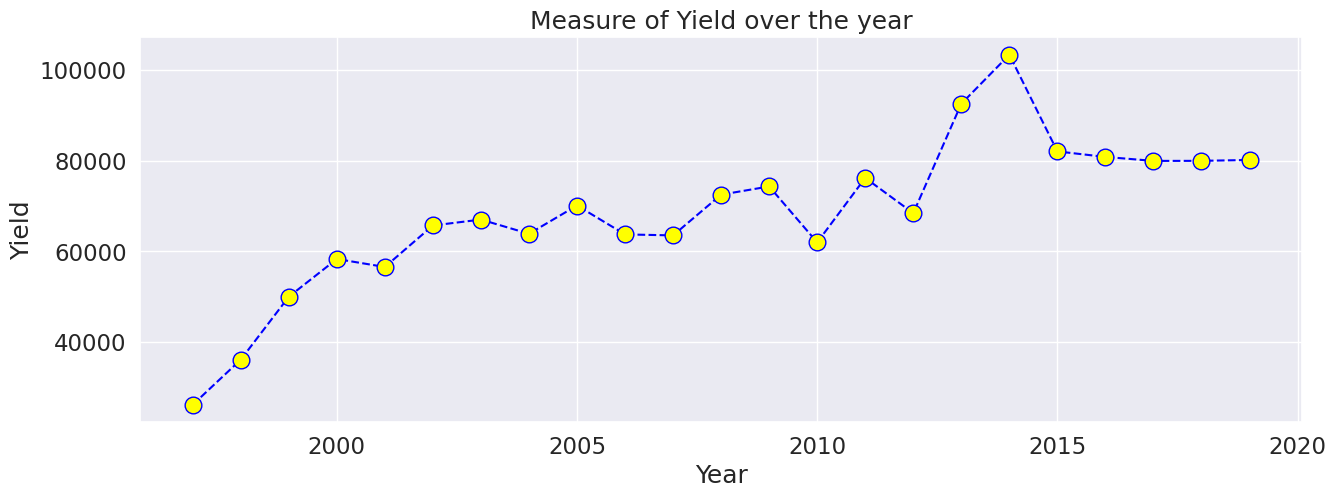

In [30]:
df_state = df.groupby('Crop_Year',as_index=False)['Yield'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Yield'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

In [31]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Yield
29,West Bengal,291986.75
21,Puducherry,232163.60
0,Andhra Pradesh,229735.18
24,Tamil Nadu,185813.28
2,Assam,160612.65
12,Karnataka,151391.87
13,Kerala,147710.35
6,Goa,87275.96
25,Telangana,39508.73
7,Gujarat,5471.63


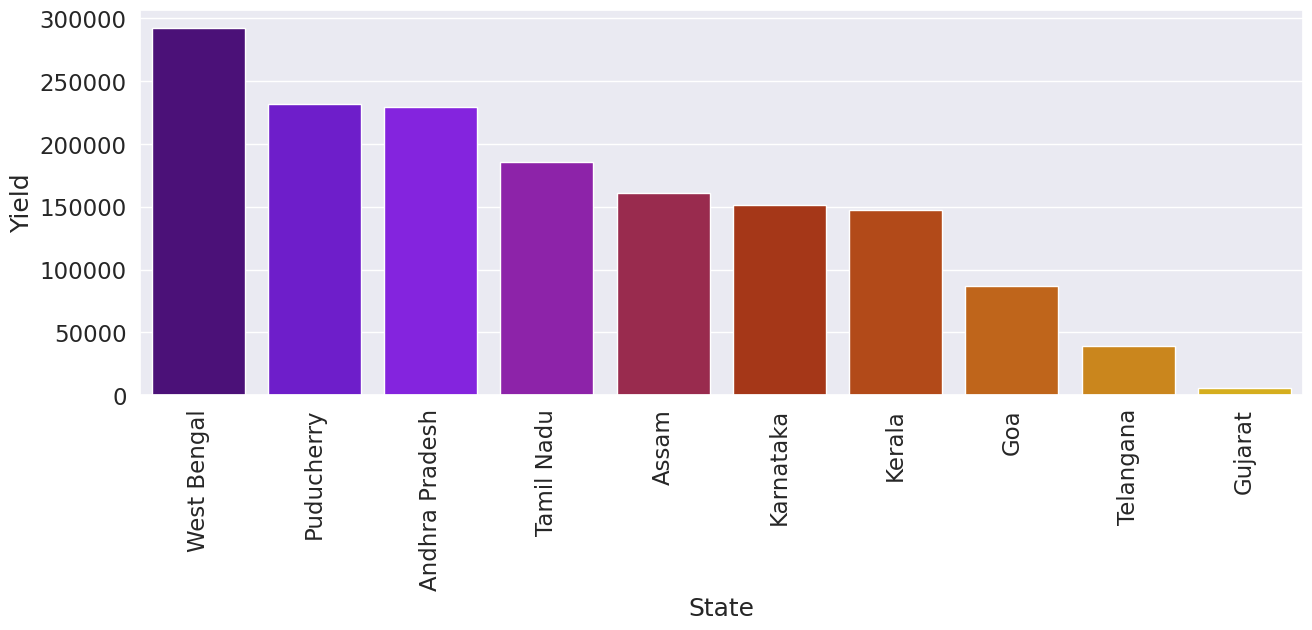

In [32]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Yield'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [33]:
df_state_sort = df.groupby('State',as_index=False)['Annual_Rainfall'].sum().sort_values(by='Annual_Rainfall', ascending=False)
df_state_sort

,State,Annual_Rainfall
17,Meghalaya,2623959.14
29,West Bengal,1883455.70
12,Karnataka,1692392.73
13,Kerala,1536641.30
2,Assam,1531493.36
0,Andhra Pradesh,1160139.90
4,Chhattisgarh,1159347.20
20,Odisha,1098412.40
19,Nagaland,1064884.45
3,Bihar,1042239.50


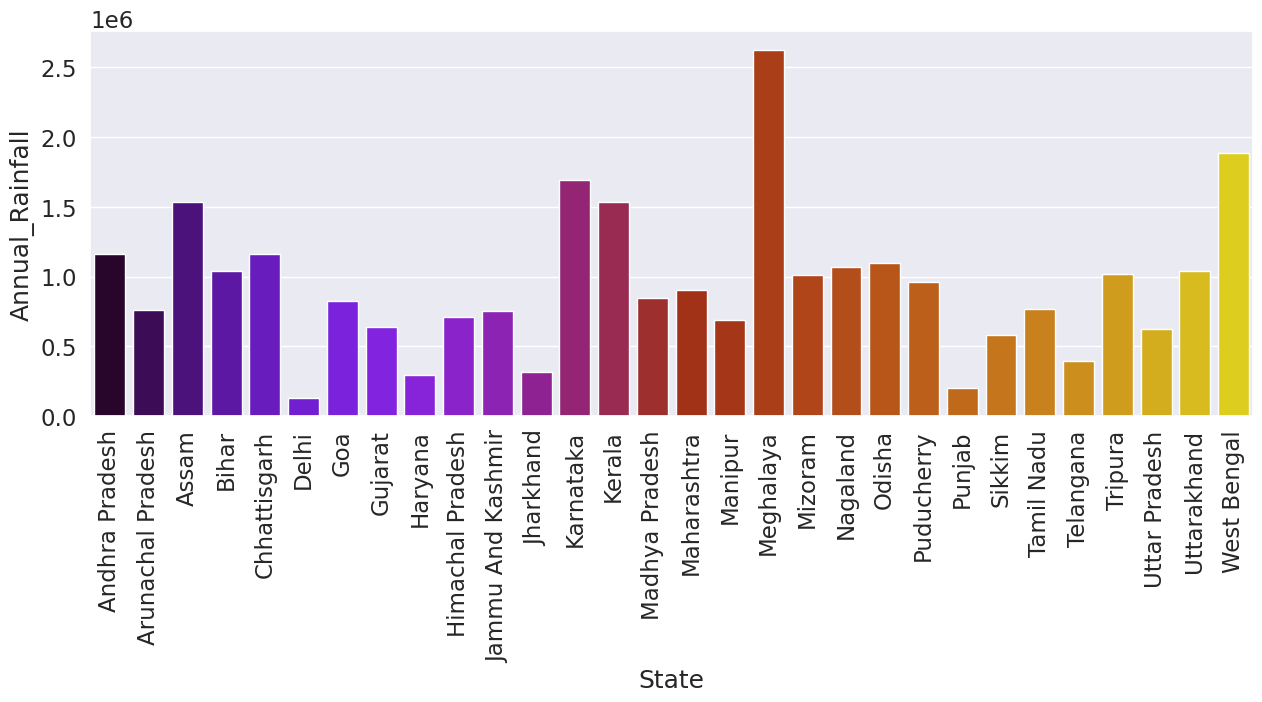

In [34]:
df_state = df.groupby('State',as_index=False)['Annual_Rainfall'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Annual_Rainfall'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

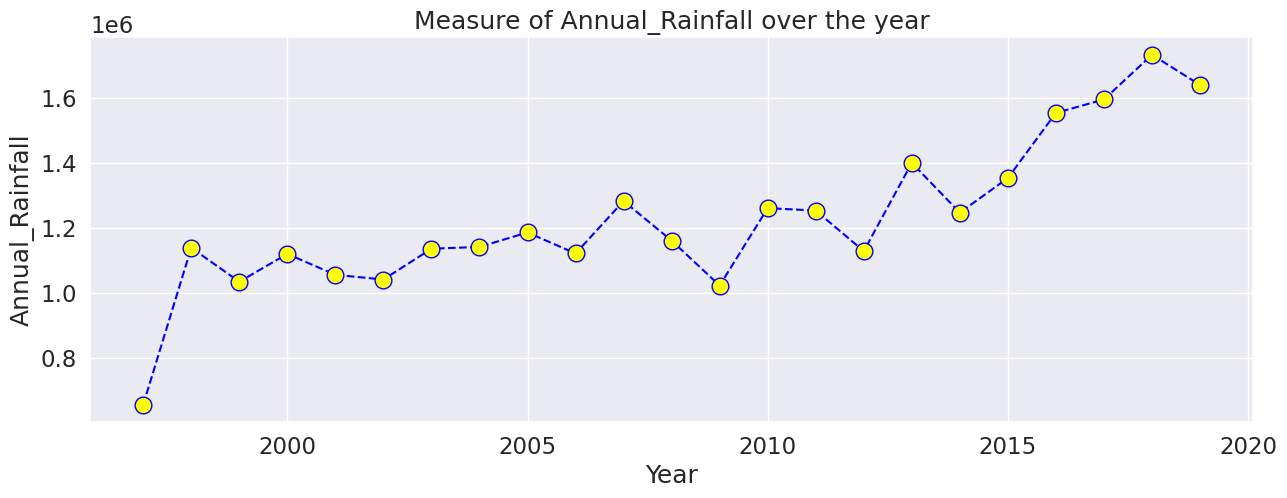

In [35]:
df_state = df.groupby('Crop_Year',as_index=False)['Annual_Rainfall'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Annual_Rainfall'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Annual_Rainfall')
plt.title('Measure of Annual_Rainfall over the year')
plt.show()

In [36]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Annual_Rainfall
17,Meghalaya,2623959.14
29,West Bengal,1883455.70
12,Karnataka,1692392.73
13,Kerala,1536641.30
2,Assam,1531493.36
0,Andhra Pradesh,1160139.90
4,Chhattisgarh,1159347.20
20,Odisha,1098412.40
19,Nagaland,1064884.45
3,Bihar,1042239.50


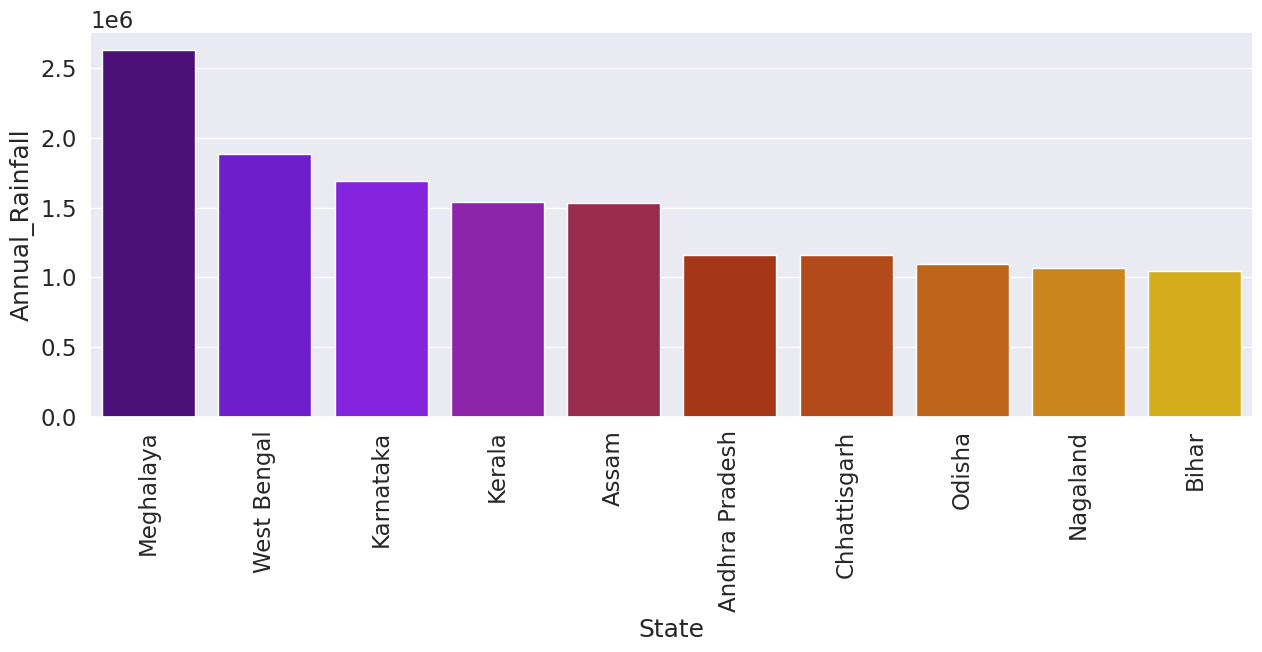

In [37]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Annual_Rainfall'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [38]:
df_state_sort = df.groupby('State',as_index=False)['Area'].sum().sort_values(by='Area', ascending=False)
df_state_sort


,State,Area
27,Uttar Pradesh,542672635.00
14,Madhya Pradesh,492087994.46
15,Maharashtra,461939552.15
12,Karnataka,257907399.00
0,Andhra Pradesh,238925335.00
29,West Bengal,237682264.87
7,Gujarat,222434333.20
3,Bihar,167995431.00
22,Punjab,162040200.00
8,Haryana,131506993.60


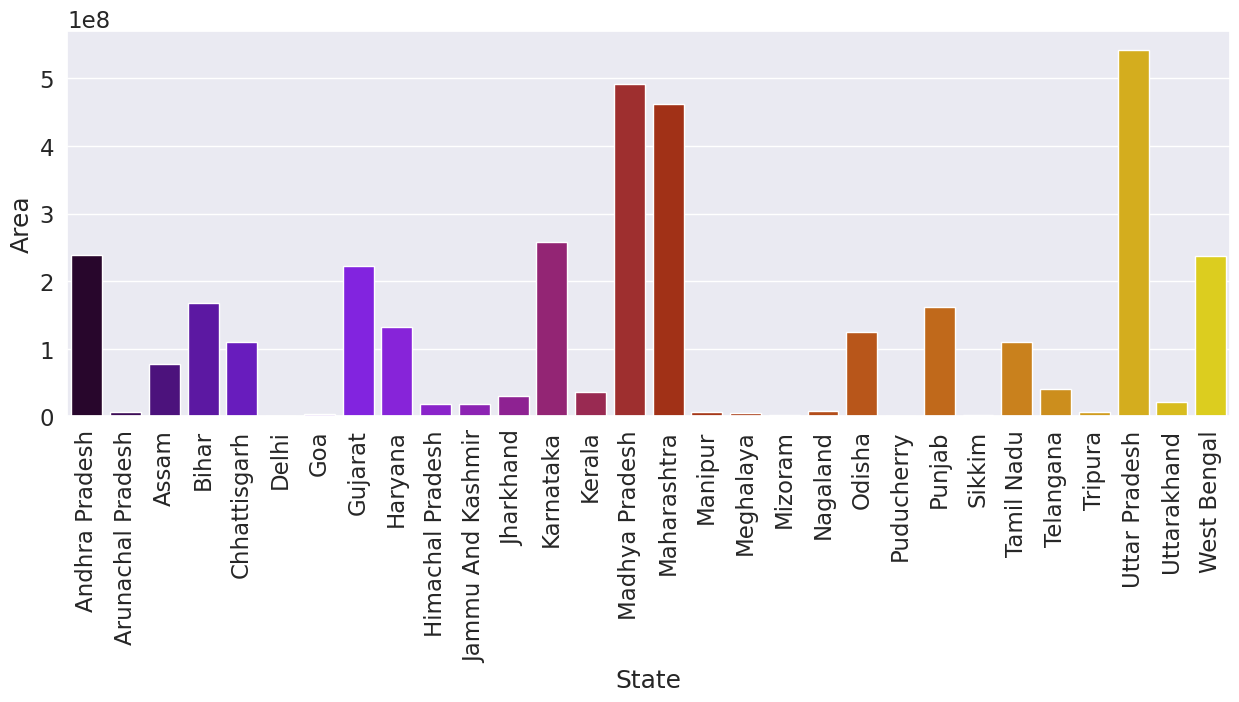

In [39]:
df_state = df.groupby('State',as_index=False)['Area'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Area'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

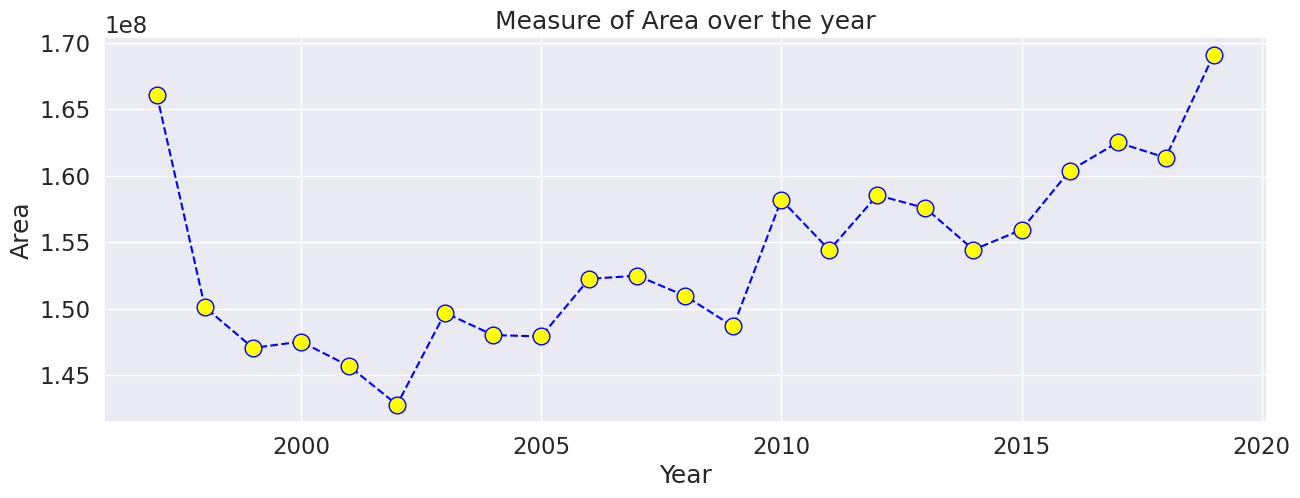

In [40]:
df_state = df.groupby('Crop_Year',as_index=False)['Area'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Area'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Measure of Area over the year')
plt.show()

In [41]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Area
27,Uttar Pradesh,542672635.00
14,Madhya Pradesh,492087994.46
15,Maharashtra,461939552.15
12,Karnataka,257907399.00
0,Andhra Pradesh,238925335.00
29,West Bengal,237682264.87
7,Gujarat,222434333.20
3,Bihar,167995431.00
22,Punjab,162040200.00
8,Haryana,131506993.60


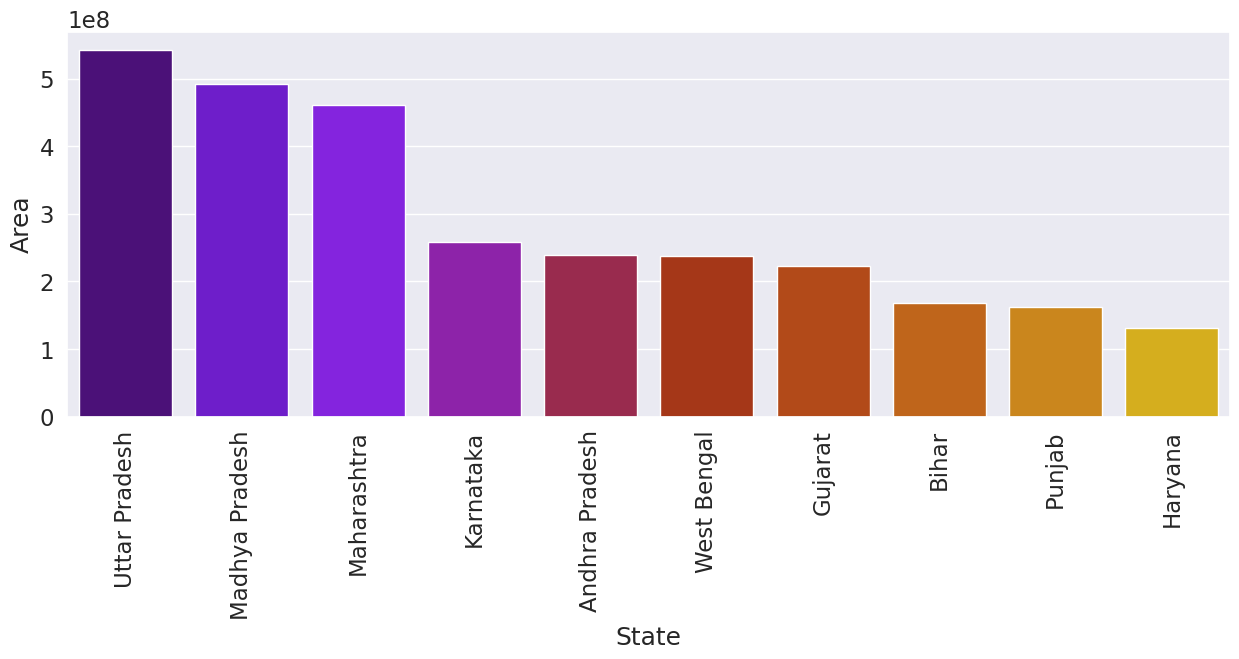

In [42]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Area'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [43]:
df_state_sort = df.groupby('State',as_index=False)['Production'].sum().sort_values(by='Production', ascending=False)
df_state_sort

,State,Production
13,Kerala,129700649853
24,Tamil Nadu,78051759253
12,Karnataka,63772797366
0,Andhra Pradesh,26076218605
29,West Bengal,8941179120
27,Uttar Pradesh,4442585302
2,Assam,3637714928
6,Goa,2193998349
15,Maharashtra,1878564915
14,Madhya Pradesh,834490323


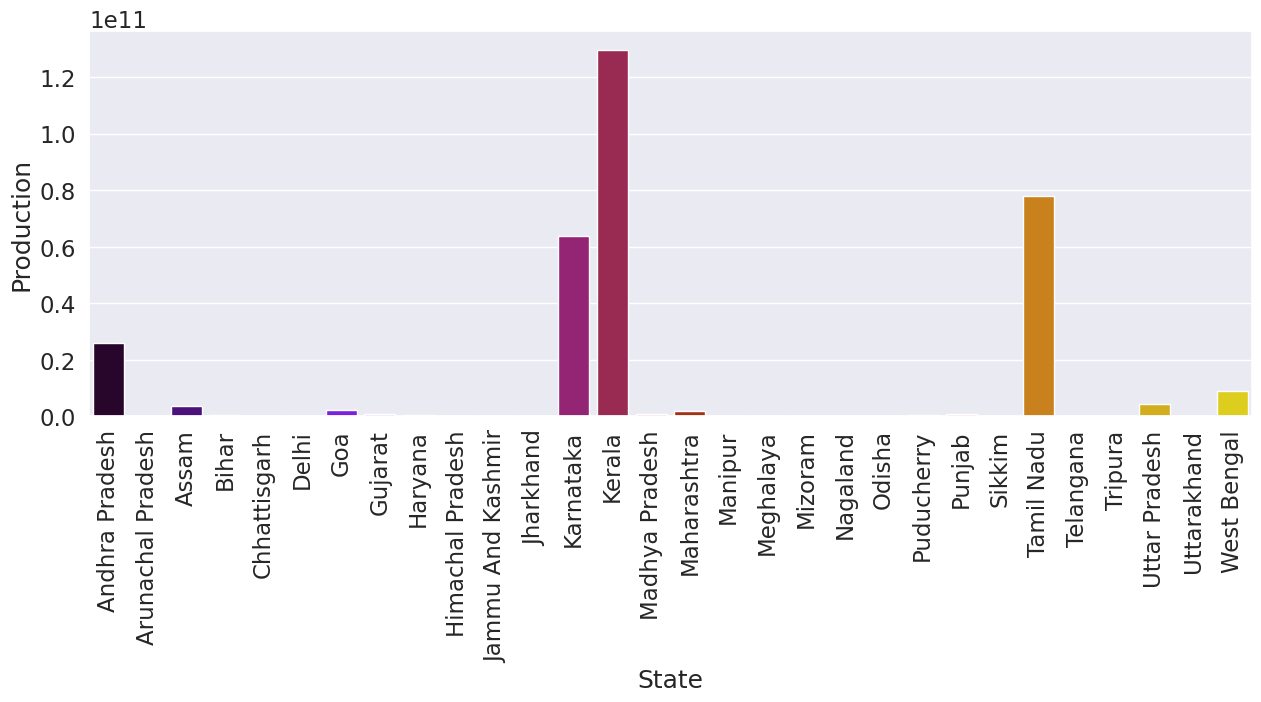

In [44]:
df_state = df.groupby('State',as_index=False)['Production'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Production'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

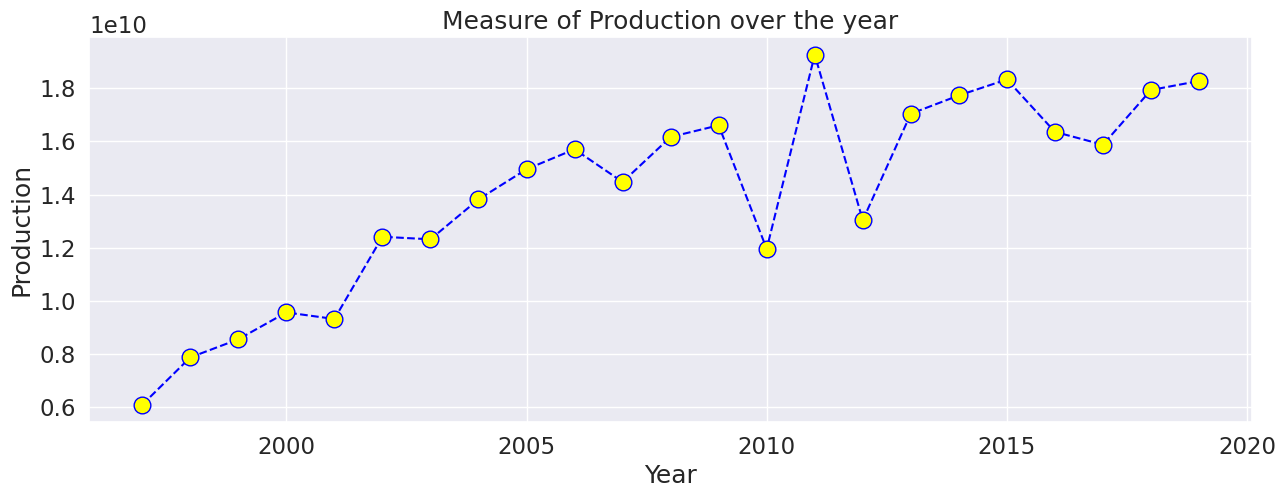

In [45]:
df_state = df.groupby('Crop_Year',as_index=False)['Production'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Production'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Measure of Production over the year')
plt.show()

In [46]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Production
13,Kerala,129700649853
24,Tamil Nadu,78051759253
12,Karnataka,63772797366
0,Andhra Pradesh,26076218605
29,West Bengal,8941179120
27,Uttar Pradesh,4442585302
2,Assam,3637714928
6,Goa,2193998349
15,Maharashtra,1878564915
14,Madhya Pradesh,834490323


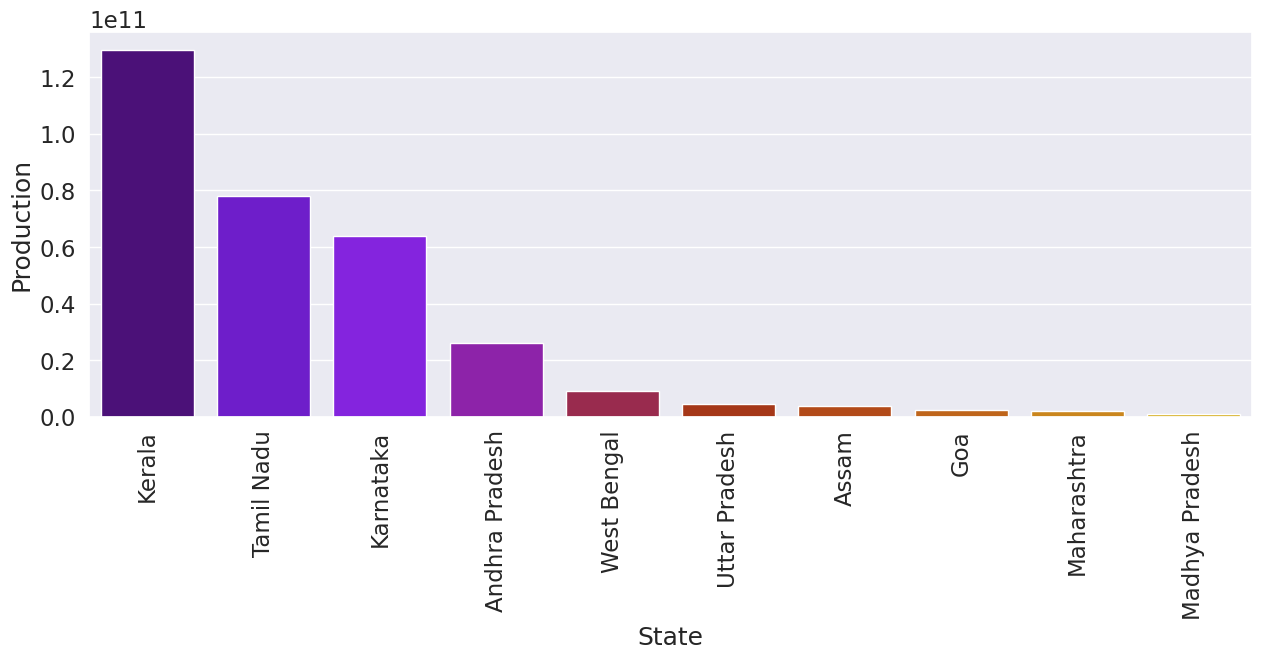

In [47]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Production'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [48]:
df_state_sort = df.groupby('State',as_index=False)['Fertilizer'].sum().sort_values(by='Fertilizer', ascending=False)
df_state_sort

,State,Fertilizer
27,Uttar Pradesh,72452818301.10
14,Madhya Pradesh,67088002956.53
15,Maharashtra,62389066345.90
12,Karnataka,34580241907.79
0,Andhra Pradesh,31258901413.96
7,Gujarat,29930280998.95
29,West Bengal,29704801335.98
3,Bihar,22202119051.38
22,Punjab,21652297765.00
8,Haryana,17645132988.55


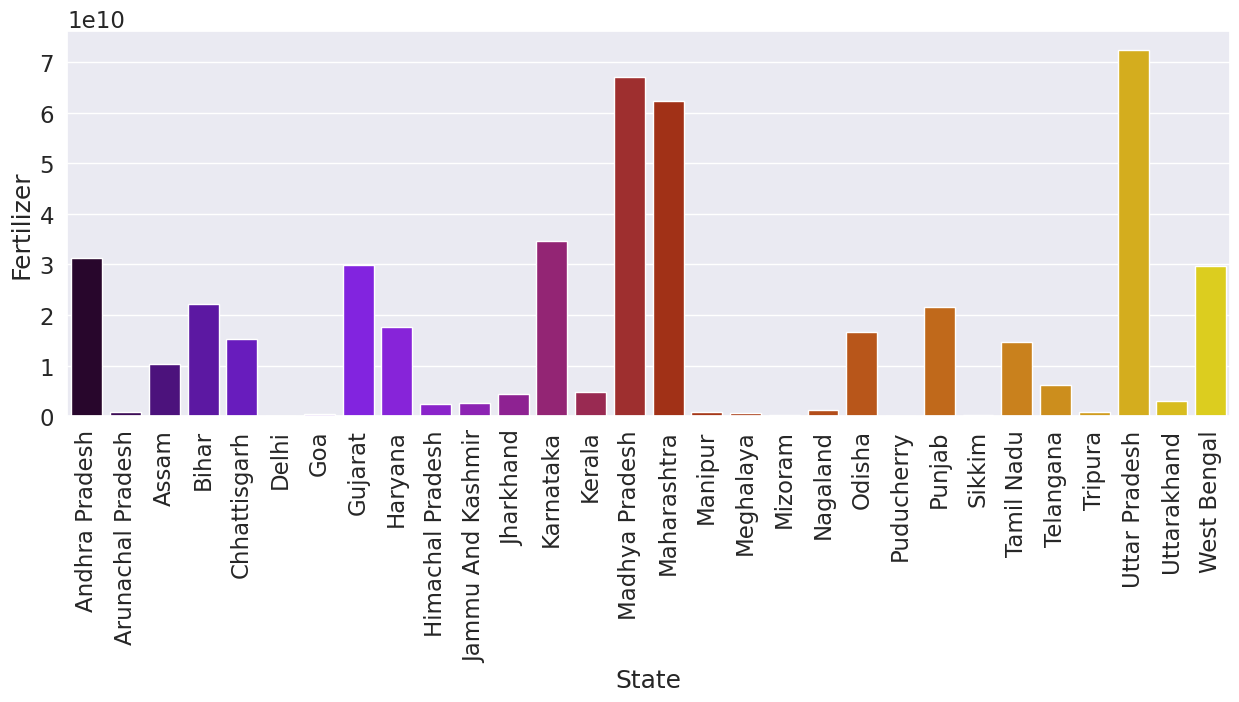

In [49]:
df_state = df.groupby('State',as_index=False)['Fertilizer'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Fertilizer'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

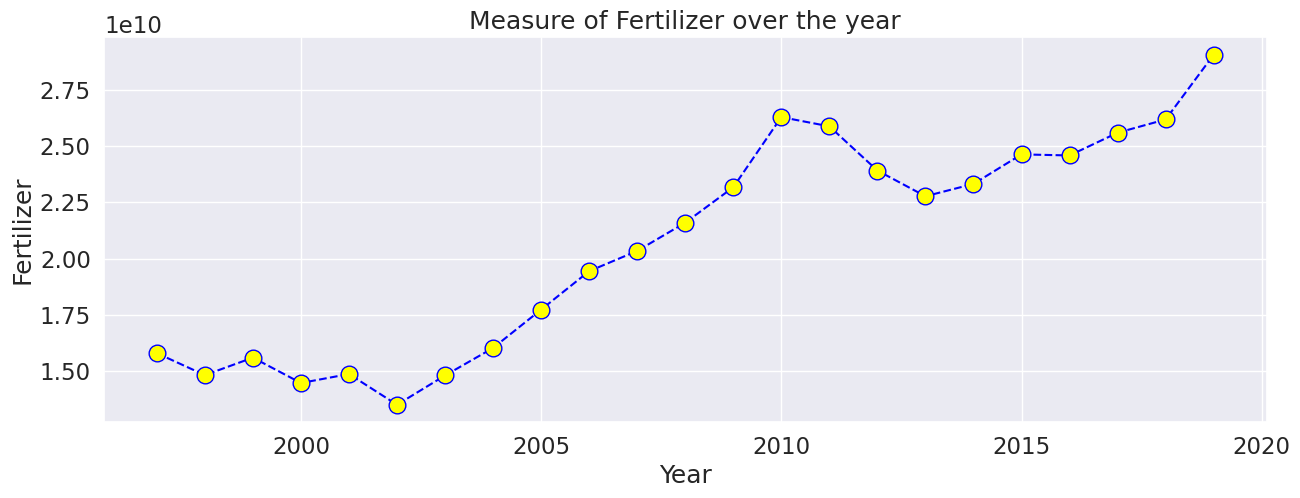

In [50]:
df_state = df.groupby('Crop_Year',as_index=False)['Fertilizer'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Fertilizer'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Measure of Fertilizer over the year')
plt.show()

In [51]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Fertilizer
27,Uttar Pradesh,72452818301.10
14,Madhya Pradesh,67088002956.53
15,Maharashtra,62389066345.90
12,Karnataka,34580241907.79
0,Andhra Pradesh,31258901413.96
7,Gujarat,29930280998.95
29,West Bengal,29704801335.98
3,Bihar,22202119051.38
22,Punjab,21652297765.00
8,Haryana,17645132988.55


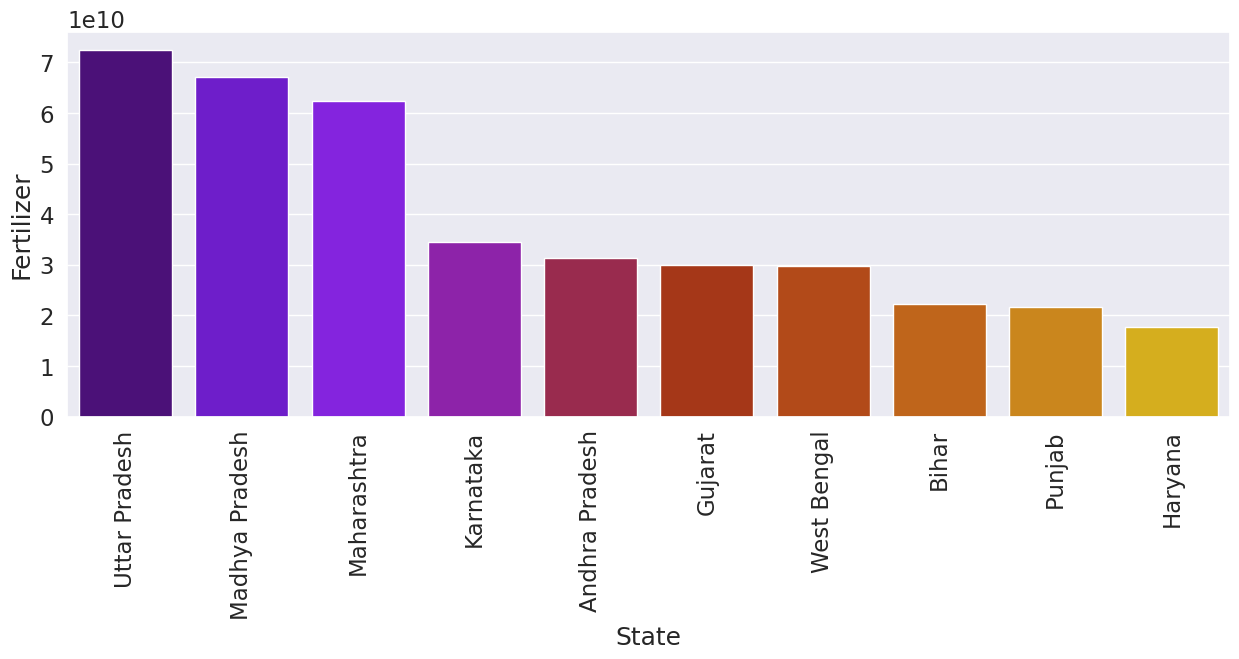

In [52]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Fertilizer'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [53]:
df_state_sort = df.groupby('State',as_index=False)['Pesticide'].sum().sort_values(by='Pesticide', ascending=False)
df_state_sort

,State,Pesticide
27,Uttar Pradesh,147133481.22
14,Madhya Pradesh,135990782.02
15,Maharashtra,124688508.91
12,Karnataka,69173115.92
29,West Bengal,66126649.48
0,Andhra Pradesh,62107242.85
7,Gujarat,60067111.89
3,Bihar,45310803.07
22,Punjab,43752763.00
8,Haryana,35710255.77


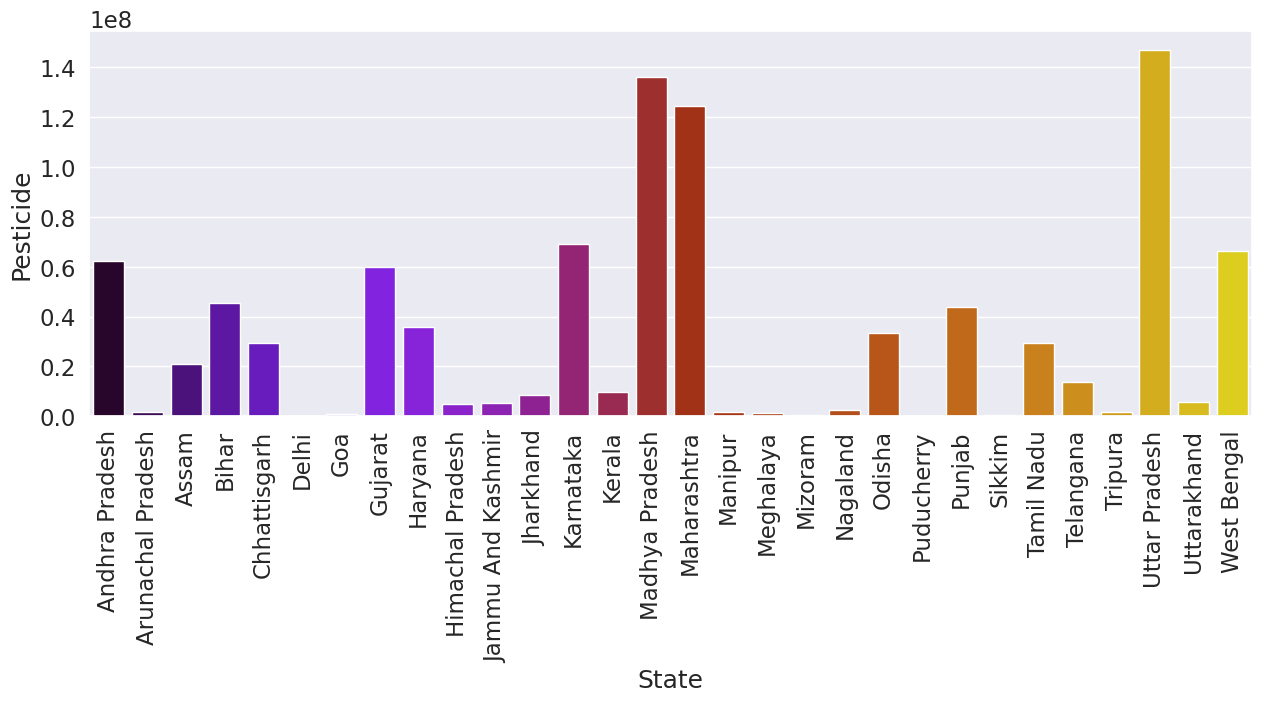

In [54]:
df_state = df.groupby('State',as_index=False)['Pesticide'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Pesticide'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

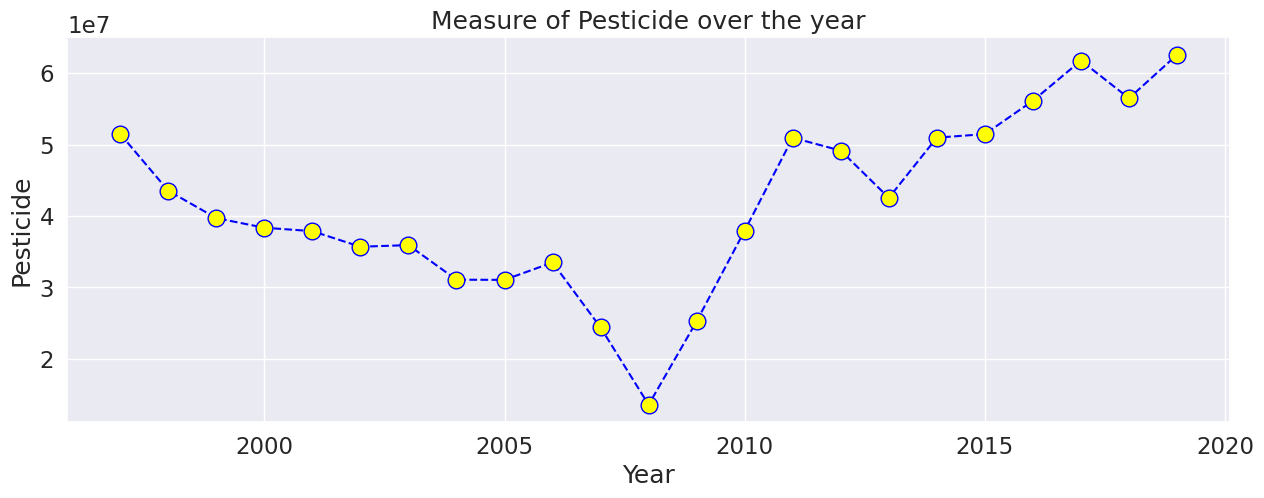

In [55]:
df_state = df.groupby('Crop_Year',as_index=False)['Pesticide'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Pesticide'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Measure of Pesticide over the year')
plt.show()

In [56]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Pesticide
27,Uttar Pradesh,147133481.22
14,Madhya Pradesh,135990782.02
15,Maharashtra,124688508.91
12,Karnataka,69173115.92
29,West Bengal,66126649.48
0,Andhra Pradesh,62107242.85
7,Gujarat,60067111.89
3,Bihar,45310803.07
22,Punjab,43752763.00
8,Haryana,35710255.77


In [57]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Pesticide
27,Uttar Pradesh,147133481.22
14,Madhya Pradesh,135990782.02
15,Maharashtra,124688508.91
12,Karnataka,69173115.92
29,West Bengal,66126649.48
0,Andhra Pradesh,62107242.85
7,Gujarat,60067111.89
3,Bihar,45310803.07
22,Punjab,43752763.00
8,Haryana,35710255.77


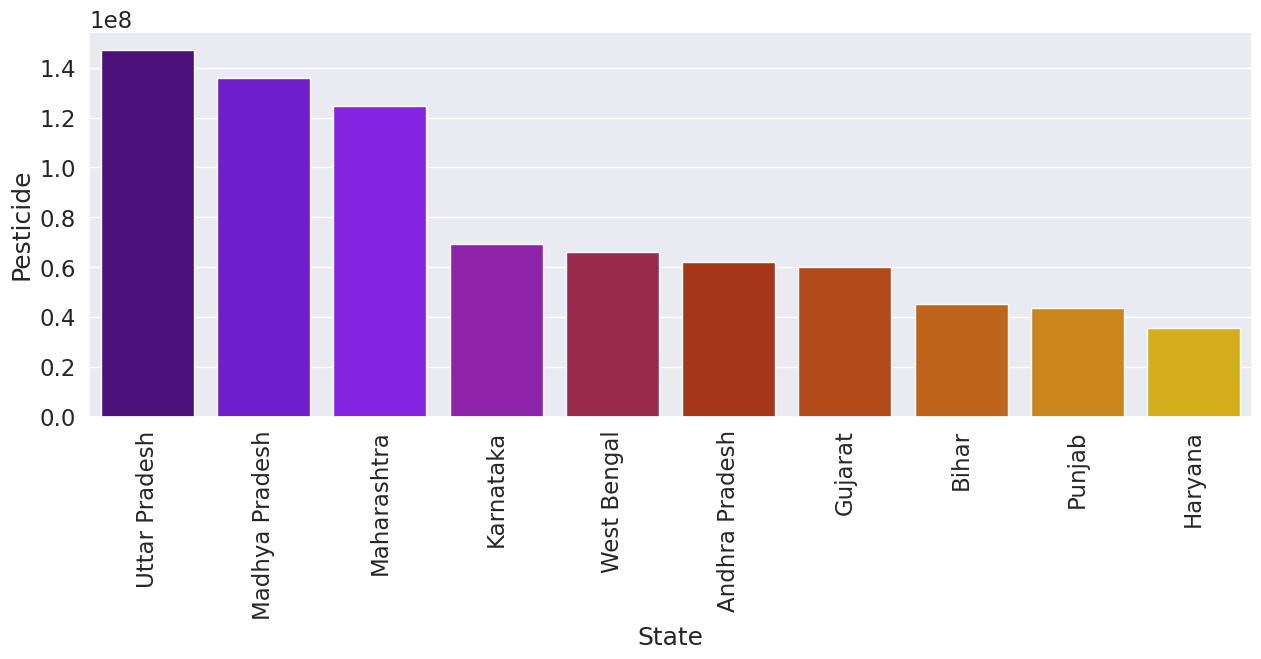

In [58]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Pesticide'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [59]:
df_without_eda = df.copy()

In [60]:
df_without_eda.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.00,56708,2051.40,7024878.38,22882.34,0.80
1,Arhar/Tur,1997,Kharif,Assam,6637.00,4685,2051.40,631643.29,2057.47,0.71
2,Castor Seed,1997,Kharif,Assam,796.00,22,2051.40,75755.32,246.76,0.24
3,Coconut,1997,Whole Year,Assam,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05
4,Cotton(Lint),1997,Kharif,Assam,1739.00,794,2051.40,165500.63,539.09,0.42


In [61]:
df_without_eda = df_without_eda.drop(['Area', 'Production'], axis=1)

In [62]:
df_without_eda.head()

,Crop,Crop_Year,Season,State,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,2051.40,7024878.38,22882.34,0.80
1,Arhar/Tur,1997,Kharif,Assam,2051.40,631643.29,2057.47,0.71
2,Castor Seed,1997,Kharif,Assam,2051.40,75755.32,246.76,0.24
3,Coconut,1997,Whole Year,Assam,2051.40,1870661.52,6093.36,5238.05
4,Cotton(Lint),1997,Kharif,Assam,2051.40,165500.63,539.09,0.42


In [63]:
category_columns = df_without_eda.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [64]:
df_without_eda = pd.get_dummies(df_without_eda, columns = category_columns, drop_first=True)

In [65]:
df_without_eda.shape

(19652, 93)

In [66]:
df_without_eda.head()

,Crop_Year,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor Seed,Crop_Coconut,Crop_Coriander,Crop_Cotton(Lint),Crop_Cowpea(Lobia),Crop_Dry Chillies,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Groundnut,Crop_Guar Seed,Crop_Horse-Gram,Crop_Jowar,Crop_Jute,Crop_Khesari,Crop_Linseed,Crop_Maize,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Moth,Crop_Niger Seed,Crop_Oilseeds Total,Crop_Onion,Crop_Other Rabi Pulses,Crop_Other Cereals,Crop_Other Kharif Pulses,Crop_Other Oilseeds,Crop_Other Summer Pulses,Crop_Peas & Beans (Pulses),Crop_Potato,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Sannhamp,Crop_Sesamum,Crop_Small Millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet Potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu And Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,2051.40,7024878.38,22882.34,0.80,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1997,2051.40,631643.29,2057.47,0.71,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1997,2051.40,75755.32,246.76,0.24,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1997,2051.40,1870661.52,6093.36,5238.05,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1997,2051.40,165500.63,539.09,0.42,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [67]:
boolean_cols_auto = df_without_eda.select_dtypes(include=['bool']).columns
df_without_eda[boolean_cols_auto] = df_without_eda[boolean_cols_auto].astype(int)

In [68]:
df_without_eda.head()

,Crop_Year,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor Seed,Crop_Coconut,Crop_Coriander,Crop_Cotton(Lint),Crop_Cowpea(Lobia),Crop_Dry Chillies,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Groundnut,Crop_Guar Seed,Crop_Horse-Gram,Crop_Jowar,Crop_Jute,Crop_Khesari,Crop_Linseed,Crop_Maize,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Moth,Crop_Niger Seed,Crop_Oilseeds Total,Crop_Onion,Crop_Other Rabi Pulses,Crop_Other Cereals,Crop_Other Kharif Pulses,Crop_Other Oilseeds,Crop_Other Summer Pulses,Crop_Peas & Beans (Pulses),Crop_Potato,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Sannhamp,Crop_Sesamum,Crop_Small Millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet Potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu And Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,2051.40,7024878.38,22882.34,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1997,2051.40,631643.29,2057.47,0.71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1997,2051.40,75755.32,246.76,0.24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1997,2051.40,1870661.52,6093.36,5238.05,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1997,2051.40,165500.63,539.09,0.42,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
x = df_without_eda.drop(['Yield'], axis = 1)
y = df_without_eda['Yield']


In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [72]:
print("x_train - >  ",x_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (15721, 92)
y_train - >   (15721,)
x_test  - >   (3931, 92)
y_test  - >   (3931,)


In [73]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

In [74]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.

    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """
    # Fit the model
    model.fit(x_train, y_train)

    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100

    # Calculate Adjusted R² scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))

    # Calculate RMSE scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2)
    testing_scores_rmse.append(test_rmse)

    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R² = {train_r2:.2f}%, Adjusted R² = {train_adj_r2:.2f}%, RMSE = {train_rmse:.4f}")
    print(f"Testing Data : R² = {test_r2:.2f}%, Adjusted R² = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")

In [75]:
evaluate_model_performance(
    model=LinearRegression(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

LinearRegression Performance Metrics:
Training Data: R² = 84.83%, Adjusted R² = 84.74%, RMSE = 346.8866
Testing Data : R² = 81.87%, Adjusted R² = 81.44%, RMSE = 353.9153



In [76]:
evaluate_model_performance(
    model=Ridge(alpha=1.0),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Ridge Performance Metrics:
Training Data: R² = 84.82%, Adjusted R² = 84.74%, RMSE = 346.9668
Testing Data : R² = 81.87%, Adjusted R² = 81.43%, RMSE = 353.9572



In [77]:
evaluate_model_performance(
    model=Lasso(alpha=0.1),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data: R² = 84.81%, Adjusted R² = 84.72%, RMSE = 347.0942
Testing Data : R² = 81.86%, Adjusted R² = 81.42%, RMSE = 354.0458



In [78]:
evaluate_model_performance(
    model=ElasticNet(alpha=0.1, l1_ratio=0.5),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

ElasticNet Performance Metrics:
Training Data: R² = 26.81%, Adjusted R² = 26.38%, RMSE = 761.9943
Testing Data : R² = 25.59%, Adjusted R² = 23.80%, RMSE = 716.9950



In [79]:
evaluate_model_performance(
    model=DecisionTreeRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

DecisionTreeRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 0.0000
Testing Data : R² = 97.44%, Adjusted R² = 97.38%, RMSE = 132.8761



In [80]:
evaluate_model_performance(
    model=RandomForestRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data: R² = 99.60%, Adjusted R² = 99.60%, RMSE = 56.0879
Testing Data : R² = 98.05%, Adjusted R² = 98.00%, RMSE = 116.1608



In [81]:
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

AdaBoostRegressor Performance Metrics:
Training Data: R² = 93.71%, Adjusted R² = 93.67%, RMSE = 223.4531
Testing Data : R² = 92.60%, Adjusted R² = 92.42%, RMSE = 226.0897



In [82]:
evaluate_model_performance(
    model=GradientBoostingRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

GradientBoostingRegressor Performance Metrics:
Training Data: R² = 99.07%, Adjusted R² = 99.06%, RMSE = 86.0406
Testing Data : R² = 97.93%, Adjusted R² = 97.88%, RMSE = 119.5558



In [83]:
evaluate_model_performance(
    model=LGBMRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 15721, number of used features: 91
[LightGBM] [Info] Start training from score 82.538217
LGBMRegressor Performance Metrics:
Training Data: R² = 97.57%, Adjusted R² = 97.56%, RMSE = 138.7803
Testing Data : R² = 94.69%, Adjusted R² = 94.56%, RMSE = 191.5109



In [84]:
evaluate_model_performance(
    model=XGBRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

XGBRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 3.6557
Testing Data : R² = 98.40%, Adjusted R² = 98.36%, RMSE = 105.2820



In [85]:
evaluate_model_performance(
    model=CatBoostRegressor(verbose=False),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

CatBoostRegressor Performance Metrics:
Training Data: R² = 99.96%, Adjusted R² = 99.96%, RMSE = 17.3960
Testing Data : R² = 97.91%, Adjusted R² = 97.86%, RMSE = 120.1761



In [86]:
from sklearn.neighbors import KNeighborsRegressor

In [87]:
evaluate_model_performance(
    model=KNeighborsRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

KNeighborsRegressor Performance Metrics:
Training Data: R² = 20.46%, Adjusted R² = 19.99%, RMSE = 794.3327
Testing Data : R² = -20.80%, Adjusted R² = -23.70%, RMSE = 913.5520



In [88]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [89]:
# Define base models
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = KNeighborsRegressor()

In [90]:
voting_regressor = VotingRegressor(estimators=[('lr', model1),('rf', model2),('knn', model3)])

In [91]:
evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

VotingRegressor Performance Metrics:
Training Data: R² = 86.11%, Adjusted R² = 86.03%, RMSE = 331.9447
Testing Data : R² = 78.00%, Adjusted R² = 77.47%, RMSE = 389.8875



In [92]:
base_regressor = DecisionTreeRegressor(random_state=42)

In [94]:
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,  # Updated parameter name
    n_estimators=50,          # Number of base estimators
    max_samples=0.8,          # Fraction of samples to use for each base estimator
    max_features=0.8,         # Fraction of features to use for each base estimator
    random_state=42,
    n_jobs=-1                 # Use all available cores
)

In [95]:
evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

BaggingRegressor Performance Metrics:
Training Data: R² = 98.97%, Adjusted R² = 98.96%, RMSE = 90.3709
Testing Data : R² = 96.49%, Adjusted R² = 96.41%, RMSE = 155.7289



In [96]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [97]:
base_models = [
    ('dt', DecisionTreeRegressor(max_depth=5, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
]


In [99]:
base_models = [
    ('dt', DecisionTreeRegressor(max_depth=5, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
]

In [102]:
meta_model = KNeighborsRegressor()

In [103]:
stacking_regressor = StackingRegressor(
    estimators=base_models,  # Base models
    final_estimator=meta_model,  # Meta-model
    n_jobs=-1               # Use all available cores
)

In [104]:
stacking_regressor = StackingRegressor(
    estimators=base_models,  # Base models
    final_estimator=meta_model,  # Meta-model
    n_jobs=-1               # Use all available cores
)

In [105]:
evaluate_model_performance(
    model = stacking_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

StackingRegressor Performance Metrics:
Training Data: R² = 97.77%, Adjusted R² = 97.76%, RMSE = 132.9807
Testing Data : R² = 97.45%, Adjusted R² = 97.38%, RMSE = 132.8351



In [106]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "LGBM",
    "XGBoost",
    "CatBoost",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor",
    "Stacking Regressor"]


In [107]:
df_model = pd.DataFrame(
        {"Algorithms":models,
         "Training Score R2":training_scores_r2,
         "Training Score Adjusted R2":training_scores_adj_r2,
         "Training Score RMSE":training_scores_rmse,
         "Testing Score R2":testing_scores_r2,
         "Testing Score Adjusted R2":testing_scores_adj_r2,
         "Testing Score RMSE":testing_scores_rmse,
        })

df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort

,Algorithms,Training Score R2,Training Score Adjusted R2,Training Score RMSE,Testing Score R2,Testing Score Adjusted R2,Testing Score RMSE
9,XGBoost,100.00,100.00,3.66,98.40,98.36,105.28
5,Random Forest,99.60,99.60,56.09,98.05,98.00,116.16
7,Gradient Boost,99.07,99.06,86.04,97.93,97.88,119.56
10,CatBoost,99.96,99.96,17.40,97.91,97.86,120.18
14,Stacking Regressor,97.77,97.76,132.98,97.45,97.38,132.84
4,Decision Tree,100.00,100.00,0.00,97.44,97.38,132.88
13,Bagging Regressor,98.97,98.96,90.37,96.49,96.41,155.73
8,LGBM,97.57,97.56,138.78,94.69,94.56,191.51
6,Ada Boost,93.71,93.67,223.45,92.60,92.42,226.09
0,Linear Regression,84.83,84.74,346.89,81.87,81.44,353.92


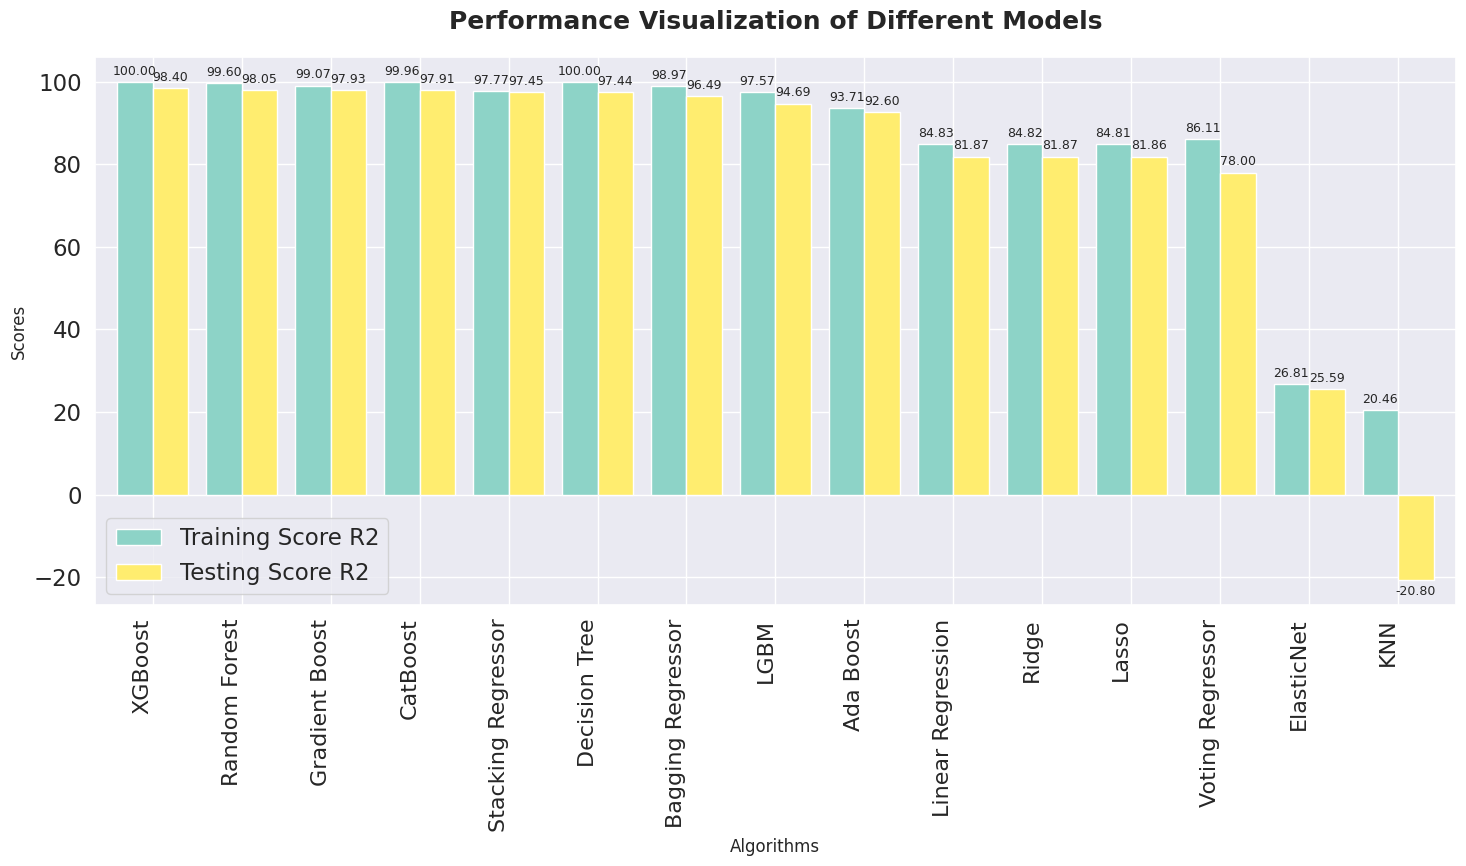

In [108]:
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(15, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

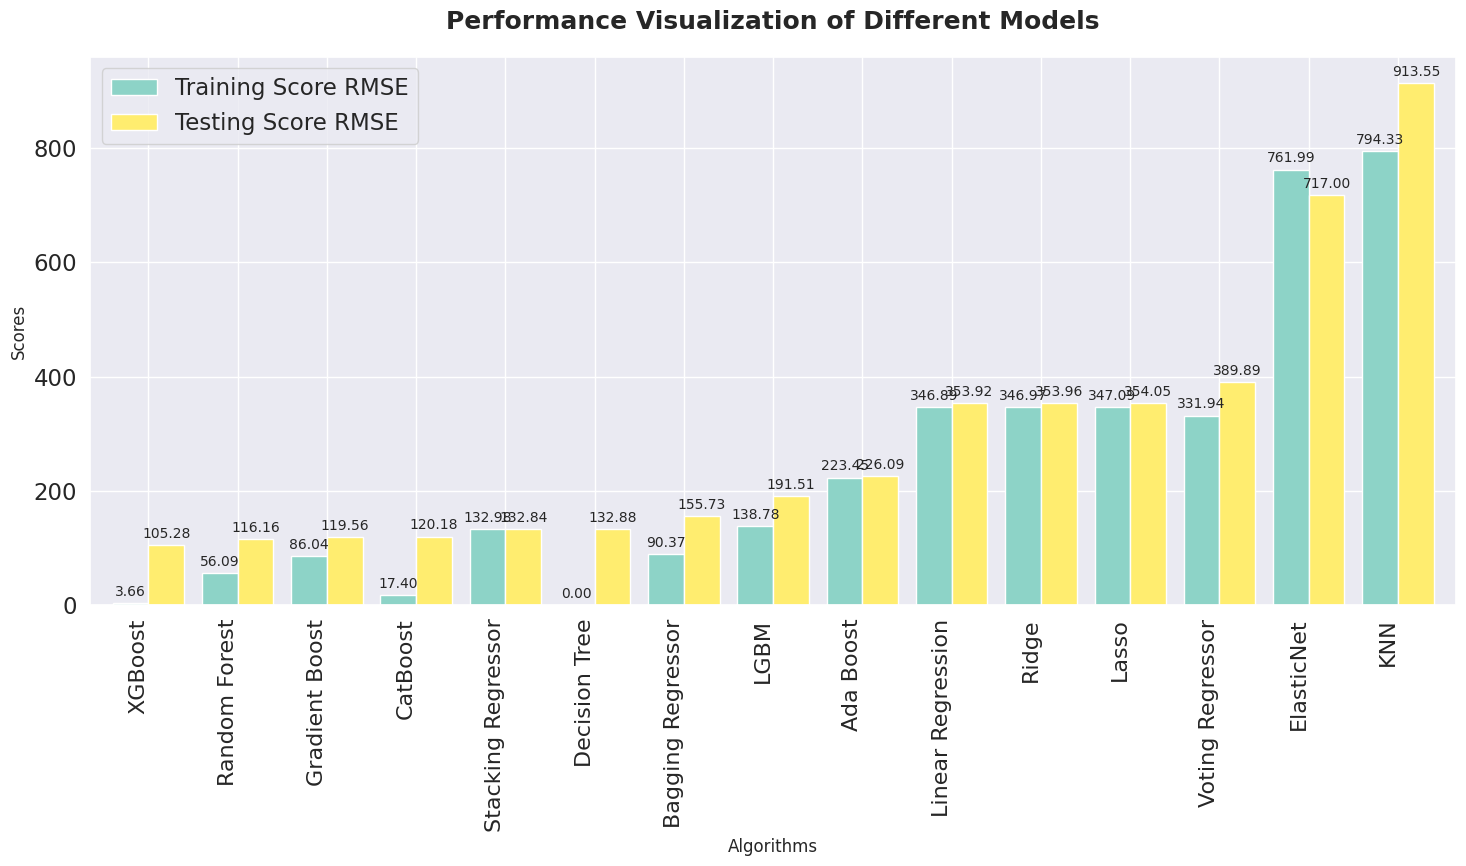

In [110]:
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE","Testing Score RMSE"],
    kind="bar",
    figsize=(15, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

In [112]:
df_with_eda = df.copy()

In [114]:
df_with_eda.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.00,56708,2051.40,7024878.38,22882.34,0.80
1,Arhar/Tur,1997,Kharif,Assam,6637.00,4685,2051.40,631643.29,2057.47,0.71
2,Castor Seed,1997,Kharif,Assam,796.00,22,2051.40,75755.32,246.76,0.24
3,Coconut,1997,Whole Year,Assam,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05
4,Cotton(Lint),1997,Kharif,Assam,1739.00,794,2051.40,165500.63,539.09,0.42


In [115]:
df_with_eda = df_with_eda.drop(['Area', 'Production'], axis=1)

In [116]:
skewness = df_with_eda[['Annual_Rainfall','Fertilizer','Pesticide']].skew().sort_values()
skewness

,0
Annual_Rainfall,2.13
Fertilizer,13.40
Pesticide,25.61


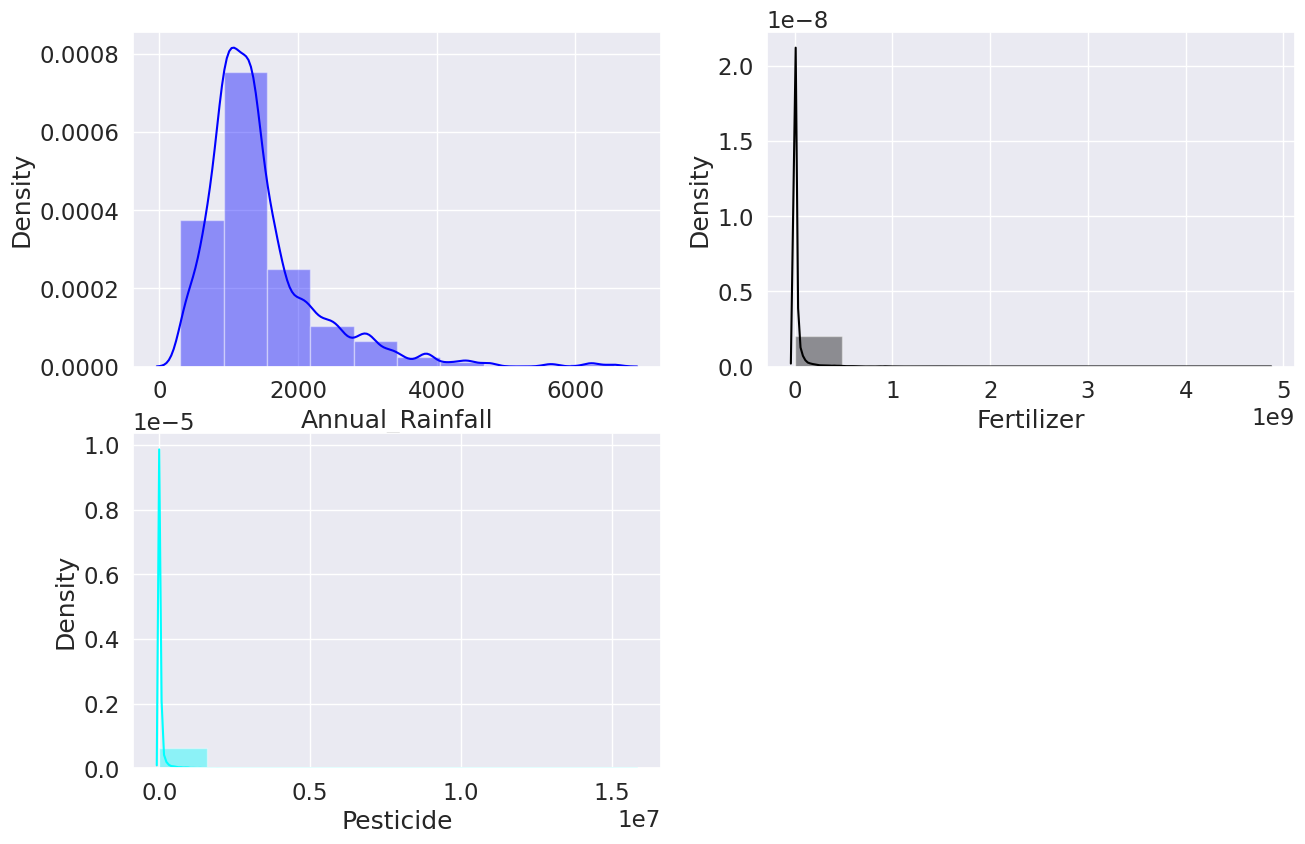

In [117]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(numeric_data['Annual_Rainfall'],bins = 10,color = 'blue')
plt.subplot(4,2,2)
sns.distplot(numeric_data['Fertilizer'],bins = 10, color = 'black')
plt.subplot(4,2,3)
sns.distplot(numeric_data['Pesticide'],bins = 10, color = 'cyan')
plt.show()

In [118]:
df_with_eda.head()

,Crop,Crop_Year,Season,State,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,2051.40,7024878.38,22882.34,0.80
1,Arhar/Tur,1997,Kharif,Assam,2051.40,631643.29,2057.47,0.71
2,Castor Seed,1997,Kharif,Assam,2051.40,75755.32,246.76,0.24
3,Coconut,1997,Whole Year,Assam,2051.40,1870661.52,6093.36,5238.05
4,Cotton(Lint),1997,Kharif,Assam,2051.40,165500.63,539.09,0.42


In [119]:
exclude_column = ['Crop','Crop_Year','Season','State','Yield']

In [120]:
vif_columns = [col for col in df_with_eda.columns if col not in exclude_column]

In [121]:
vif1 = df_with_eda[vif_columns].copy()

In [122]:
variable = vif1
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = vif_columns

In [123]:
vif.sort_values(by="Variance Inflation Factor", ascending=False)

,Variance Inflation Factor,Features
1,12.00,Fertilizer
2,11.95,Pesticide
0,1.03,Annual_Rainfall


In [124]:
vif2 = vif1.copy()

In [125]:
vif2.drop(['Fertilizer'], axis = 1, inplace=True)

In [126]:
exclude_column = ['Crop','Crop_Year','Season','State','Yield','Area']

In [127]:
vif_columns = [col for col in vif2.columns if col not in exclude_column]

In [129]:
variable = vif2
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = vif_columns

In [130]:
vif.sort_values(by="Variance Inflation Factor", ascending=False)

,Variance Inflation Factor,Features
1,1.02,Pesticide
0,1.02,Annual_Rainfall


In [131]:
df_with_eda_encoding = df_with_eda.copy()
df_with_eda_encoding = df_with_eda_encoding.drop(['Crop_Year'], axis = 1)

In [132]:
df_with_eda_encoding = df_with_eda_encoding.drop(['Fertilizer'], axis = 1)

In [133]:
df_with_eda_encoding.head()

,Crop,Season,State,Annual_Rainfall,Pesticide,Yield
0,Arecanut,Whole Year,Assam,2051.40,22882.34,0.80
1,Arhar/Tur,Kharif,Assam,2051.40,2057.47,0.71
2,Castor Seed,Kharif,Assam,2051.40,246.76,0.24
3,Coconut,Whole Year,Assam,2051.40,6093.36,5238.05
4,Cotton(Lint),Kharif,Assam,2051.40,539.09,0.42


In [134]:
category_columns = df_with_eda_encoding.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [135]:
df_with_eda_encoding = pd.get_dummies(df_with_eda_encoding, columns = category_columns, drop_first=True)

In [136]:
boolean_cols_auto = df_with_eda_encoding.select_dtypes(include=['bool']).columns
df_with_eda_encoding[boolean_cols_auto] = df_with_eda_encoding[boolean_cols_auto].astype(int)

In [137]:
df_with_eda_encoding.head()

,Annual_Rainfall,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor Seed,Crop_Coconut,Crop_Coriander,Crop_Cotton(Lint),Crop_Cowpea(Lobia),Crop_Dry Chillies,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Groundnut,Crop_Guar Seed,Crop_Horse-Gram,Crop_Jowar,Crop_Jute,Crop_Khesari,Crop_Linseed,Crop_Maize,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Moth,Crop_Niger Seed,Crop_Oilseeds Total,Crop_Onion,Crop_Other Rabi Pulses,Crop_Other Cereals,Crop_Other Kharif Pulses,Crop_Other Oilseeds,Crop_Other Summer Pulses,Crop_Peas & Beans (Pulses),Crop_Potato,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Sannhamp,Crop_Sesamum,Crop_Small Millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet Potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu And Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,2051.40,22882.34,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2051.40,2057.47,0.71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2051.40,246.76,0.24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2051.40,6093.36,5238.05,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2051.40,539.09,0.42,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [138]:
x = df_with_eda_encoding.drop(['Yield'], axis = 1)
y = df_with_eda_encoding['Yield']

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [140]:
print("x_train - >  ",x_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_test  - >  ",y_test.shape)


x_train - >   (15721, 90)
y_train - >   (15721,)
x_test  - >   (3931, 90)
y_test  - >   (3931,)


In [141]:
pt = PowerTransformer(method='yeo-johnson')

In [142]:
x_train_scaled = pt.fit_transform(x_train)
x_test_scaled = pt.transform(x_test)

In [143]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

In [144]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.

    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """
    # Fit the model
    model.fit(x_train, y_train)

    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100

    # Calculate Adjusted R² scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))

    # Calculate RMSE scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2)
    testing_scores_rmse.append(test_rmse)

    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R² = {train_r2:.2f}%, Adjusted R² = {train_adj_r2:.2f}%, RMSE = {train_rmse:.4f}")
    print(f"Testing Data : R² = {test_r2:.2f}%, Adjusted R² = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")


In [145]:
evaluate_model_performance(
    model=LinearRegression(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

LinearRegression Performance Metrics:
Training Data: R² = 84.82%, Adjusted R² = 84.73%, RMSE = 347.0002
Testing Data : R² = 81.87%, Adjusted R² = 81.45%, RMSE = 353.8658



In [147]:
ridge_regressor = Ridge(
    alpha=1.0,                  # Regularization strength
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    copy_X=True,                # If True, it makes a copy of the input matrix X
    max_iter=None,              # Maximum number of iterations for the solver
    tol=0.001,                  # Tolerance for stopping criteria
    solver='auto',              # Solver to use ('auto', 'lsqr', 'saga', etc.)
    random_state=None,          # Random state for reproducibility
    positive=False              # If True, coefficients are constrained to be positive
)

In [148]:
evaluate_model_performance(
    model=ridge_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

Ridge Performance Metrics:
Training Data: R² = 84.82%, Adjusted R² = 84.73%, RMSE = 347.0002
Testing Data : R² = 81.87%, Adjusted R² = 81.45%, RMSE = 353.8651



In [149]:
# Create the Lasso Regression model
lasso_regressor = Lasso(
    alpha=1.0,                  # Regularization strength
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    copy_X=True,                # If True, it makes a copy of the input matrix X
    max_iter=1000,              # Maximum number of iterations for the solver
    tol=0.0001,                 # Tolerance for stopping criteria
    random_state=None,          # Random state for reproducibility
    positive=False              # If True, coefficients are constrained to be positive
)

In [151]:
evaluate_model_performance(
    model=lasso_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data: R² = 84.80%, Adjusted R² = 84.71%, RMSE = 347.2556
Testing Data : R² = 81.85%, Adjusted R² = 81.43%, RMSE = 354.0883



In [153]:
elasticnet_regressor = ElasticNet(
    alpha=1.0,                  # Regularization strength
    l1_ratio=0.5,               # The balance between Lasso (L1) and Ridge (L2) regularization (0 is Ridge, 1 is Lasso)
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    copy_X=True,                # If True, it makes a copy of the input matrix X
    max_iter=1000,              # Maximum number of iterations for the solver
    tol=0.0001,                 # Tolerance for stopping criteria
    random_state=None,          # Random state for reproducibility
    positive=False              # If True, coefficients are constrained to be positive
)

In [155]:
evaluate_model_performance(
    model=elasticnet_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

ElasticNet Performance Metrics:
Training Data: R² = 75.54%, Adjusted R² = 75.40%, RMSE = 440.5166
Testing Data : R² = 72.88%, Adjusted R² = 72.25%, RMSE = 432.8184



In [158]:
# Create the DecisionTree Regressor model
decision_tree_regressor = DecisionTreeRegressor(
    criterion='squared_error',    # Updated to 'squared_error' for mean squared error
    splitter='best',              # Strategy used to split at each node
    max_depth=None,               # Maximum depth of the tree
    min_samples_split=2,          # Minimum number of samples required to split an internal node
    min_samples_leaf=1,           # Minimum number of samples required to be at a leaf node
    max_features=None,            # The number of features to consider when looking for the best split
    random_state=42,              # Controls the randomness for reproducibility
    max_leaf_nodes=None,          # Grow a tree with a maximum number of leaf nodes
    min_impurity_decrease=0.0,    # Minimum impurity decrease required to make a further split
    ccp_alpha=0.0                # Complexity parameter used for Minimal Cost-Complexity Pruning
)


In [159]:
evaluate_model_performance(
    model=decision_tree_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

DecisionTreeRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 0.0019
Testing Data : R² = 96.46%, Adjusted R² = 96.38%, RMSE = 156.4167



In [162]:
random_forest_regressor = RandomForestRegressor(
    criterion='squared_error',    # Updated to 'squared_error' for mean squared error
    n_estimators=100,             # Number of trees in the forest
    max_depth=None,               # Maximum depth of the tree
    min_samples_split=2,          # Minimum number of samples required to split an internal node
    min_samples_leaf=1,           # Minimum number of samples required to be at a leaf node
    max_features='sqrt',          # Use square root of features for the best split
    random_state=42,              # Controls the randomness for reproducibility
    n_jobs=-1,                    # Use all available cores for parallel processing
    max_samples=None,             # If bootstrap=True, the number of samples to draw from X to train each base estimator
)


In [164]:
evaluate_model_performance(
    model=random_forest_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data: R² = 99.39%, Adjusted R² = 99.38%, RMSE = 69.7037
Testing Data : R² = 95.47%, Adjusted R² = 95.36%, RMSE = 176.8989



In [166]:
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

AdaBoostRegressor Performance Metrics:
Training Data: R² = 95.47%, Adjusted R² = 95.44%, RMSE = 189.5871
Testing Data : R² = 96.87%, Adjusted R² = 96.79%, RMSE = 147.1092



In [168]:
evaluate_model_performance(
    model=GradientBoostingRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

GradientBoostingRegressor Performance Metrics:
Training Data: R² = 98.91%, Adjusted R² = 98.90%, RMSE = 93.1181
Testing Data : R² = 97.82%, Adjusted R² = 97.77%, RMSE = 122.7901



In [170]:
evaluate_model_performance(
    model=LGBMRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 15721, number of used features: 89
[LightGBM] [Info] Start training from score 82.538217
LGBMRegressor Performance Metrics:
Training Data: R² = 96.75%, Adjusted R² = 96.73%, RMSE = 160.6873
Testing Data : R² = 94.79%, Adjusted R² = 94.67%, RMSE = 189.6407



In [172]:
evaluate_model_performance(
    model=XGBRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

XGBRegressor Performance Metrics:
Training Data: R² = 99.95%, Adjusted R² = 99.95%, RMSE = 19.2660
Testing Data : R² = 97.19%, Adjusted R² = 97.12%, RMSE = 139.3308



In [173]:
evaluate_model_performance(
    model=CatBoostRegressor(verbose=False),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

CatBoostRegressor Performance Metrics:
Training Data: R² = 99.87%, Adjusted R² = 99.87%, RMSE = 31.5966
Testing Data : R² = 97.20%, Adjusted R² = 97.14%, RMSE = 139.0117



In [174]:
from sklearn.neighbors import KNeighborsRegressor

In [175]:
# Create the KNeighbors Regressor model
knn_regressor = KNeighborsRegressor(
    n_neighbors=5,               # Number of neighbors to use
    weights='uniform',           # Weight function: 'uniform' or 'distance'
    algorithm='auto',            # Algorithm used to compute the nearest neighbors
    leaf_size=30,                # Leaf size for tree-based algorithms
    metric='minkowski',          # The distance metric: 'minkowski', 'euclidean', etc.
    p=2,                         # Power parameter for the Minkowski metric (2 for Euclidean distance)
    n_jobs=-1                    # Use all available cores for parallel processing
)

In [176]:
evaluate_model_performance(
    model=knn_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

KNeighborsRegressor Performance Metrics:
Training Data: R² = 97.29%, Adjusted R² = 97.27%, RMSE = 146.6222
Testing Data : R² = 97.36%, Adjusted R² = 97.30%, RMSE = 134.9854



In [177]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [178]:
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = KNeighborsRegressor()

In [179]:
voting_regressor = VotingRegressor(estimators=[('lr', model1),('rf', model2),('knn', model3)])

In [180]:
evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

VotingRegressor Performance Metrics:
Training Data: R² = 96.87%, Adjusted R² = 96.86%, RMSE = 157.4622
Testing Data : R² = 95.56%, Adjusted R² = 95.46%, RMSE = 175.0536



In [181]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [182]:
base_regressor = DecisionTreeRegressor(random_state=42)

In [183]:
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,  # Updated parameter name
    n_estimators=50,           # Number of base estimators
    max_samples=0.8,           # Fraction of samples to use for each base estimator
    max_features=0.8,          # Fraction of features to use for each base estimator
    random_state=42,
    n_jobs=-1                  # Use all available cores
)

In [184]:
evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

BaggingRegressor Performance Metrics:
Training Data: R² = 99.02%, Adjusted R² = 99.02%, RMSE = 88.0073
Testing Data : R² = 95.49%, Adjusted R² = 95.38%, RMSE = 176.5826



In [185]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


In [185]:
base_models = [
    ('dt', DecisionTreeRegressor(max_depth=5, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
]

In [186]:
# Define the meta-model (level-1)
meta_model = KNeighborsRegressor()

In [187]:
stacking_regressor = StackingRegressor(
    estimators=base_models,  # Base models
    final_estimator=meta_model,  # Meta-model
    n_jobs=-1               # Use all available cores
)

In [188]:
evaluate_model_performance(
    model = stacking_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

StackingRegressor Performance Metrics:
Training Data: R² = 98.40%, Adjusted R² = 98.39%, RMSE = 112.7770
Testing Data : R² = 96.93%, Adjusted R² = 96.86%, RMSE = 145.6970



In [189]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "LGBM",
    "XGBoost",
    "CatBoost",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor",
    "Stacking Regressor"]

In [200]:
print(len(models))
print(len(training_scores_r2))
print(len(training_scores_adj_r2))
print(len(training_scores_rmse))
print(len(testing_scores_r2))
print(len(testing_scores_adj_r2))
print(len(testing_scores_rmse))


15
22
22
22
22
22
22


In [201]:
print("Length of models:", len(models))
print("Length of other lists:", len(training_scores_r2))

print("models:", models)
print("training_scores_r2:", training_scores_r2[:15])  # Compare first 15 elements


Length of models: 15
Length of other lists: 22
models: ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'LGBM', 'XGBoost', 'CatBoost', 'KNN', 'Voting Regressor', 'Bagging Regressor', 'Stacking Regressor']
training_scores_r2: [84.82150439330024, 84.82150345704932, 84.79915601081863, 84.79915601081863, 75.53789225689815, 75.53789225689815, 99.99999999953293, 99.38753517026745, 99.38753517026745, 93.31356697708728, 95.46907358102736, 98.90695611710917, 98.90695611710917, 96.74513821446882, 96.74513821446882]


In [209]:
print(set(models))  # Ensure all models are unique


{'Ada Boost', 'Ridge', 'Bagging Regressor', 'Decision Tree', 'LGBM', 'Stacking Regressor', 'ElasticNet', 'KNN', 'XGBoost', 'Linear Regression', 'Random Forest', 'Lasso', 'CatBoost', 'Gradient Boost', 'Voting Regressor'}


In [203]:
min_length = len(models)  # 15

df_model = pd.DataFrame({
    "Algorithms": models,
    "Training Score R2": training_scores_r2[:min_length],
    "Training Score Adjusted R2": training_scores_adj_r2[:min_length],
    "Training Score RMSE": training_scores_rmse[:min_length],
    "Testing Score R2": testing_scores_r2[:min_length],
    "Testing Score Adjusted R2": testing_scores_adj_r2[:min_length],
    "Testing Score RMSE": testing_scores_rmse[:min_length]
})
df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort

,Algorithms,Training Score R2,Training Score Adjusted R2,Training Score RMSE,Testing Score R2,Testing Score Adjusted R2,Testing Score RMSE
11,KNN,98.91,98.90,93.12,97.82,97.77,122.72
12,Voting Regressor,98.91,98.90,93.12,97.82,97.77,122.79
10,CatBoost,95.47,95.44,189.59,96.87,96.79,147.11
6,Ada Boost,100.00,100.00,0.00,96.46,96.38,156.42
7,Gradient Boost,99.39,99.38,69.70,95.47,95.36,176.90
8,LGBM,99.39,99.38,69.70,95.47,95.36,176.90
13,Bagging Regressor,96.75,96.73,160.69,94.79,94.67,189.64
14,Stacking Regressor,96.75,96.73,160.69,94.79,94.67,189.64
9,XGBoost,93.31,93.28,230.31,93.35,93.19,214.42
1,Ridge,84.82,84.73,347.00,81.87,81.45,353.87


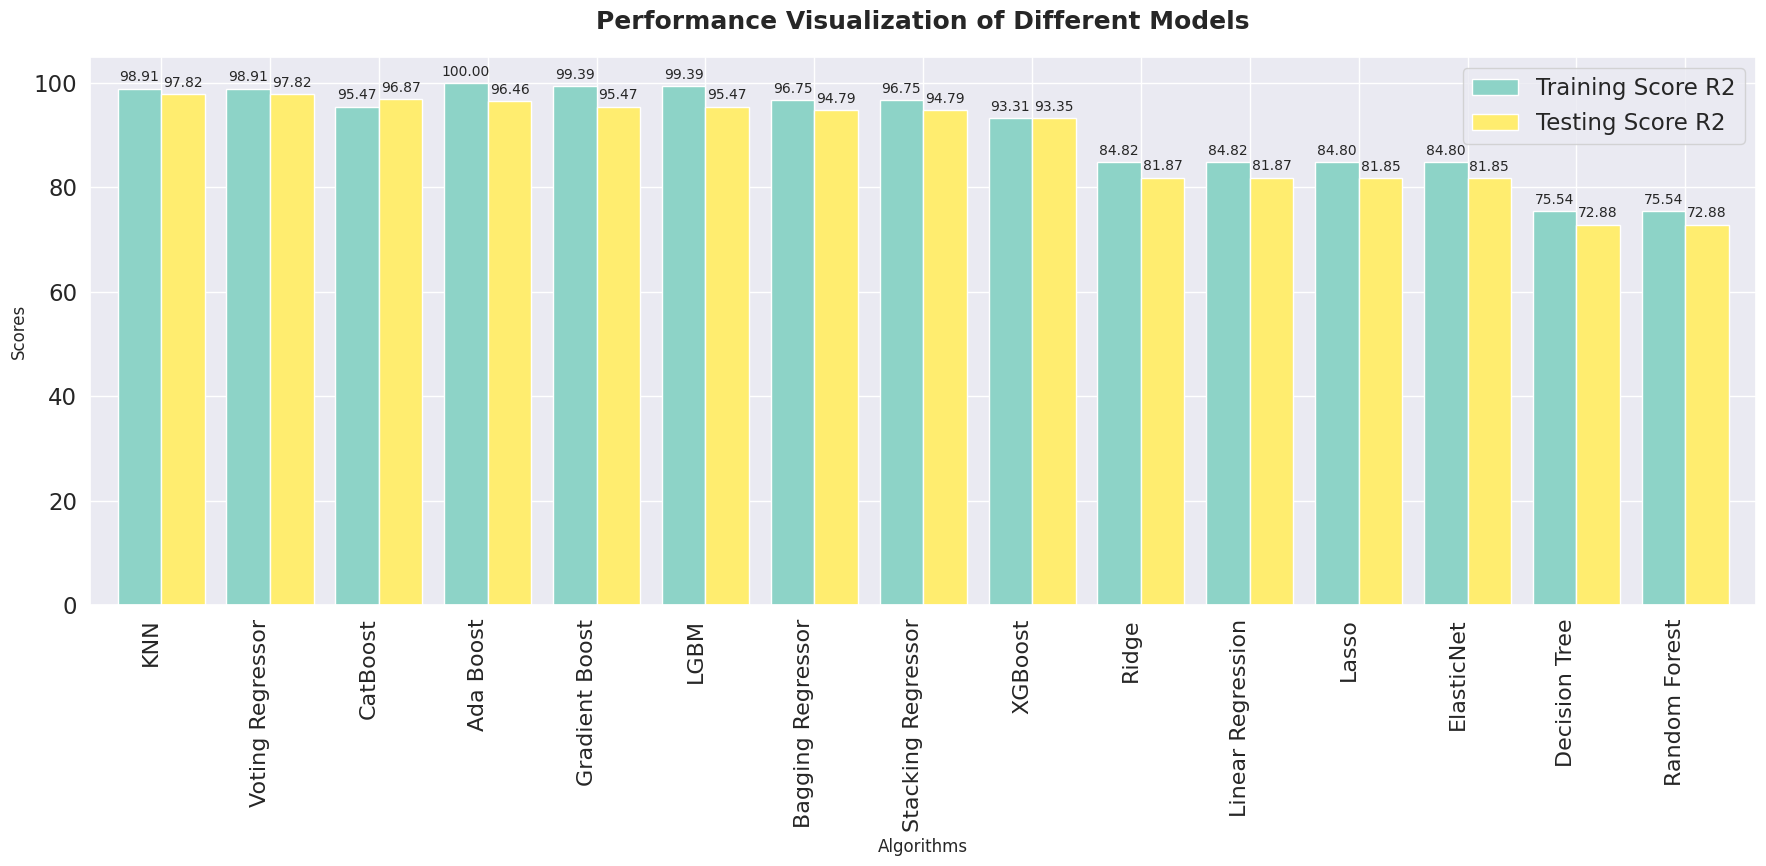

In [206]:
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(18, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

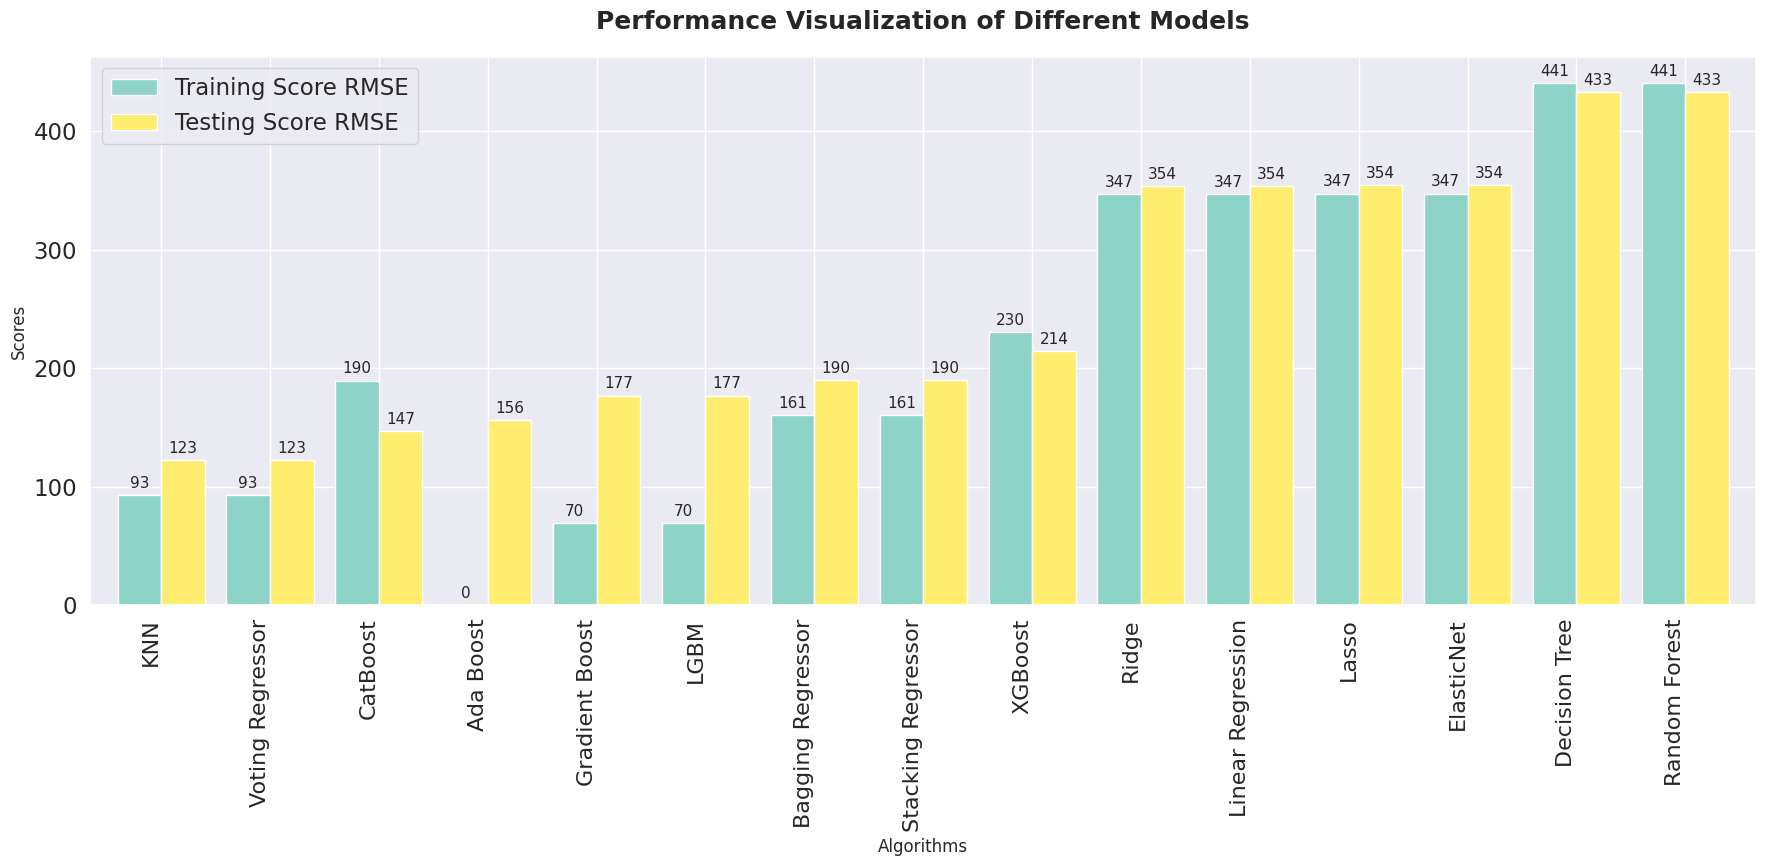

In [207]:
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE","Testing Score RMSE"],
    kind="bar",
    figsize=(18, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=11, padding=3)

plt.tight_layout()
plt.show()


In [215]:
min_length = len(models)  # 15

training_scores_rmse = np.array(training_scores_rmse)
testing_scores_rmse = np.array(testing_scores_rmse)

rmse_difference = training_scores_rmse[:min_length] - testing_scores_rmse[:min_length] #slicing the training_scores_rmse array to 15 elements

df_model = pd.DataFrame({
    "Algorithms": models,
    "Testing R2": testing_scores_r2,
    "Testing RMSE": testing_scores_rmse,
    "Training R2": training_scores_r2,
    "RMSE Difference": rmse_difference

})


df_model_sort = df_model.sort_values(by="Testing R2", ascending=False)

# Display the sorted DataFrame
print(df_model_sort)

            Algorithms  Testing R2  Testing RMSE  Training R2  RMSE Difference
0                  KNN       97.82        122.72        98.91           224.28
1     Voting Regressor       97.82        122.79        98.91           224.21
2             CatBoost       96.87        147.11        95.47           200.15
3            Ada Boost       96.46        156.42       100.00           190.84
4       Gradient Boost       95.47        176.90        99.39           263.62
5                 LGBM       95.47        176.90        99.39           263.62
6    Bagging Regressor       94.79        189.64        96.75          -189.64
7   Stacking Regressor       94.79        189.64        96.75          -119.94
8              XGBoost       93.35        214.42        93.31          -144.72
9                Ridge       81.87        353.87        84.82          -123.56
10   Linear Regression       81.87        353.87        84.82          -164.28
11               Lasso       81.85        354.09    